# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [63]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

# Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

# To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

# To set float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv("HR_Dataset.csv")

In [3]:
df_copy = df.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# cleaning column names

from skimpy import clean_columns
df = clean_columns(df)
df.columns

2 column names have been cleaned

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [9]:
# changing the position of "left" column in df

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'departments', 'salary','left']]

# alternative way
# df = df.iloc[:, [0,1, 2, 3, 4, 5, 7, 8, 9, 6]]

In [10]:
# checking the head of df

df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [11]:
# checking the tail of df

df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  \
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years departments salary  left  
14994                      0     support    low     1  
14995                      0     support    low     1  
14996                      0     support    low     1  
14997                      0     support    low     1  
14998                      0     support    low     1

In [12]:
# checking the sample of df

df.sample(20)

satisfaction_level  last_evaluation  number_project  \
357                  0.37             0.54               2   
6423                 0.36             0.69               3   
6753                 0.90             0.57               4   
8518                 0.59             0.75               4   
4638                 0.97             0.75               3   
2486                 0.49             0.50               4   
7037                 0.47             0.47               2   
14934                0.44             0.53               2   
5253                 0.95             0.78               2   
12616                0.39             0.49               2   
13668                0.40             0.62               4   
8392                 0.58             0.94               5   
8455                 0.66             0.38               4   
3021                 0.75             1.00               4   
1554                 0.90             0.83               4   
3354                 0.93             0.89               4   
10842                0.71             0.68               5   
13524                0.50             0.59               4   
13355                0.89             0.97               4   
7409                 0.23             0.70               4   

       average_montly_hours  time_spend_company  work_accident  \
357                     149                   3              0   
6423                    165                   3              0   
6753                    186                   4              0   
8518                    194                   2              0   
4638                    241                   2              0   
2486                    187                   5              1   
7037                    221                   6              0   
14934                   155                   3              0   
5253                    148                   2              0   
12616                   144                   3              0   
13668                   127                   5              0   
8392                    274                   3              0   
8455                    145                   5              0   
3021                    135                   4              0   
1554                    266                   5              0   
3354                    209                   2              0   
10842                   226                   3              0   
13524                   214                   3              1   
13355                   147                   2              0   
7409                    233                   2              0   

       promotion_last_5years  departments  salary  left  
357                        0      support     low     1  
6423                       0        sales  medium     0  
6753                       0    technical  medium     0  
8518                       0    technical     low     0  
4638                       0    technical     low     0  
2486                       0      support  medium     0  
7037                       0        sales     low     0  
14934                      0  product_mng  medium     1  
5253                       0           IT     low     0  
12616                      0    marketing  medium     1  
13668                      0   accounting     low     0  
8392                       0        RandD  medium     0  
8455                       0    technical  medium     0  
3021                       0    technical     low     0  
1554                       0        sales    high     1  
3354                       0        RandD  medium     0  
10842                      0    technical     low     0  
13524                      0    technical     low     0  
13355                      0    technical     low     0  
7409                       0   management  medium     0

In [14]:
# checking the null values in df

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
departments              0
salary                   0
left                     0
dtype: int64

In [15]:
# checking the unique values in df

df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
work_accident              2
promotion_last_5years      2
departments               10
salary                     3
left                       2
dtype: int64

In [16]:
# Defining a function to check each column in df

def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [17]:
# exploring each column in df using first_look function defined above

for col in df.columns :
    first_look(col)

column name :  satisfaction_level
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  92

Value_counts of satisfaction_level column:
 ---------------------------------------- 
 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

Value_counts of satisfaction_level column with sort_index : 
 ---------------------------------------- 
 0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
0.14     73
0.15     76
0.16     79
0.17     72
0.18     63
Name: satisfaction_level, dtype: int64

column name :  last_evaluation
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  65

Value_counts of last_evaluation column:
 ---------------------------------------- 
 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
N

In [18]:
# descriptive statistics for numerical columns

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_montly_hours  14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00

In [19]:
# descriptive statistics for categorical columns

df.describe(include="O").T

count unique    top  freq
departments  14999     10  sales  4140
salary       14999      3    low  7316

In [20]:
# descriptive statistics for numerical columns according to left situation

df.groupby("left").describe()

satisfaction_level                                    last_evaluation  \
                  count mean  std  min  25%  50%  75%  max           count   
left                                                                         
0              11428.00 0.67 0.22 0.12 0.54 0.69 0.84 1.00        11428.00   
1               3571.00 0.44 0.26 0.09 0.13 0.41 0.73 0.92         3571.00   

                                        number_project                      \
     mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
left                                                                         
0    0.72 0.16 0.36 0.58 0.71 0.85 1.00       11428.00 3.79 0.98 2.00 3.00   
1    0.72 0.20 0.45 0.52 0.79 0.90 1.00        3571.00 3.86 1.82 2.00 2.00   

                    average_montly_hours                                    \
      50%  75%  max                count   mean   std    min    25%    50%   
left                                                                         
0    4.00 4.00 6.00             11428.00 199.06 45.68  96.00 162.00 198.00   
1    4.00 6.00 7.00              3571.00 207.42 61.20 126.00 146.00 224.00   

                   time_spend_company                                      \
        75%    max              count mean  std  min  25%  50%  75%   max   
left                                                                        
0    238.00 287.00           11428.00 3.38 1.56 2.00 2.00 3.00 4.00 10.00   
1    262.00 310.00            3571.00 3.88 0.98 2.00 3.00 4.00 5.00  6.00   

     work_accident                                    promotion_last_5years  \
             count mean  std  min  25%  50%  75%  max                 count   
left                                                                          
0         11428.00 0.18 0.38 0.00 0.00 0.00 0.00 1.00              11428.00   
1          3571.00 0.05 0.21 0.00 0.00 0.00 0.00 1.00               3571.00   

                                         
     mean  std  min  25%  50%  75%  max  
left                                     
0    0.03 0.16 0.00 0.00 0.00 0.00 1.00  
1    0.01 0.07 0.00 0.00 0.00 0.00 1.00

In [21]:
# descriptive statistics for categorical columns according to left situation

df.groupby("left").describe(include="O")

departments                     salary                  
           count unique    top  freq  count unique  top  freq
left                                                         
0          11428     10  sales  3126  11428      3  low  5144
1           3571     10  sales  1014   3571      3  low  2172

In [22]:
# checking duplicates

df.duplicated().sum()

3008

In [23]:
# checking the percentage of duplicates in df

df.duplicated().sum()/df.shape[0]

0.2005467031135409

In [24]:
# dropping duplicates

df = df.drop_duplicates().reset_index(drop=True)

In [25]:
df.shape

(11991, 10)

In [27]:
# descriptive statistics for numerical columns after dropping duplicates

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
last_evaluation       11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
number_project        11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
average_montly_hours  11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00
time_spend_company    11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00
work_accident         11991.00   0.15  0.36  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 11991.00   0.02  0.13  0.00   0.00   0.00   0.00   1.00
left                  11991.00   0.17  0.37  0.00   0.00   0.00   0.00   1.00

## Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

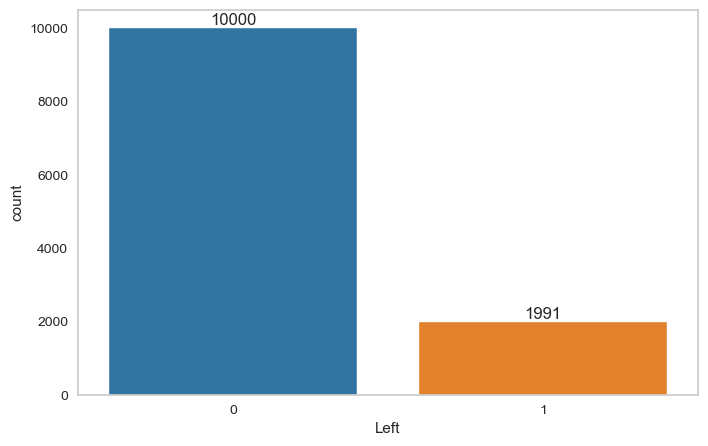

In [28]:
# Barpot to check how many  employees were 

plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [29]:
# Percentage of the employees based on the left situation

df.left.value_counts(normalize=True)

0   0.83
1   0.17
Name: left, dtype: float64

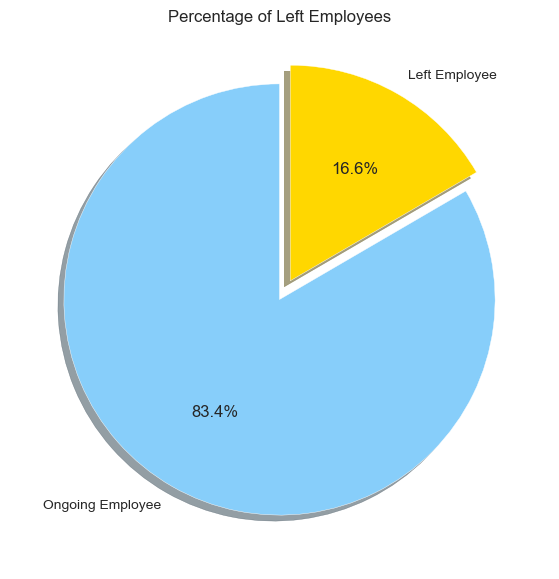

In [30]:
# Percentage of Employees based on the "left" feature

fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

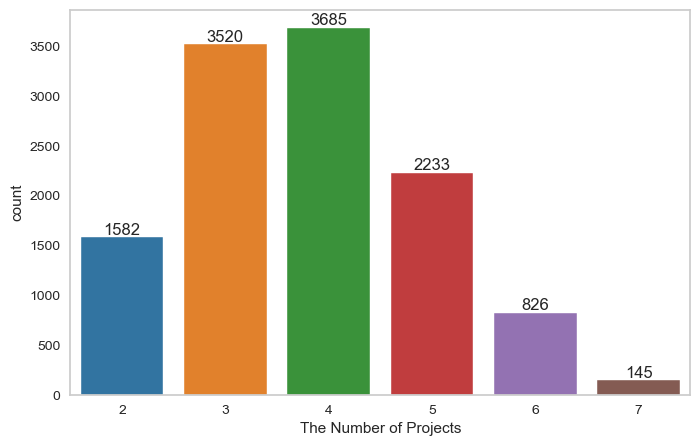

In [31]:
# Barplot for the number of employees deployed on different number of projects

plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
ax.bar_label(ax.containers[0]);

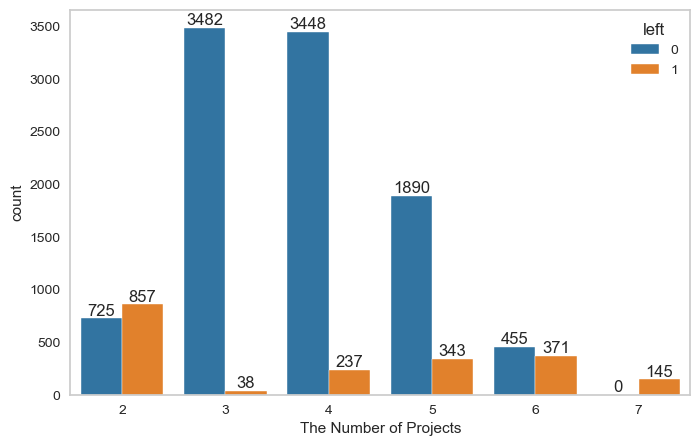

In [32]:
# Barplot to display the effect of the number of projects on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


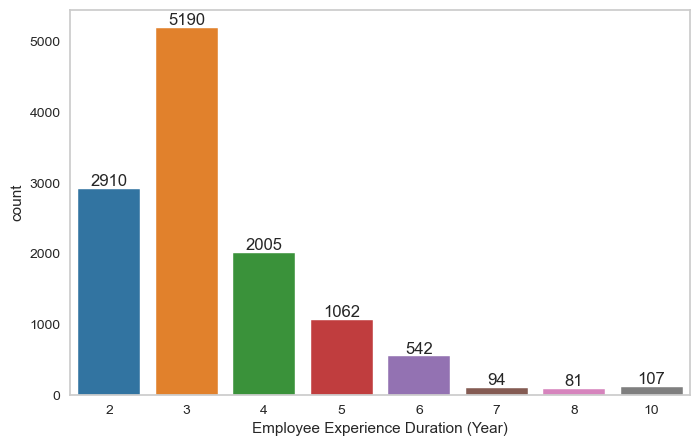

In [33]:
# Barplot to display the number of emplooyees based on the experience duration

plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", data=df, palette="tab10")
plt.xlabel("Employee Experience Duration (Year)")
ax.bar_label(ax.containers[0]);

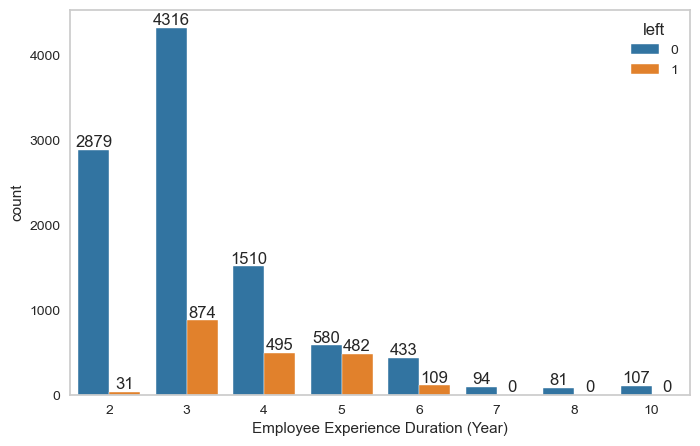

In [35]:
# Barplot to display the effect of the experience year on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

### Work Accident

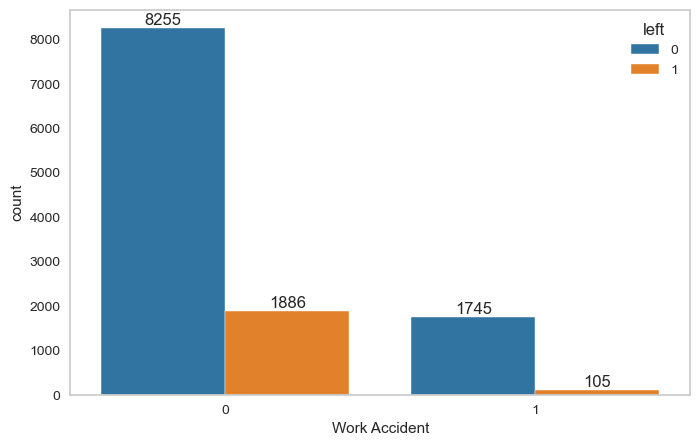

In [36]:
# Barplot to display the effect of the work accident on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

### Promotion Last 5 years

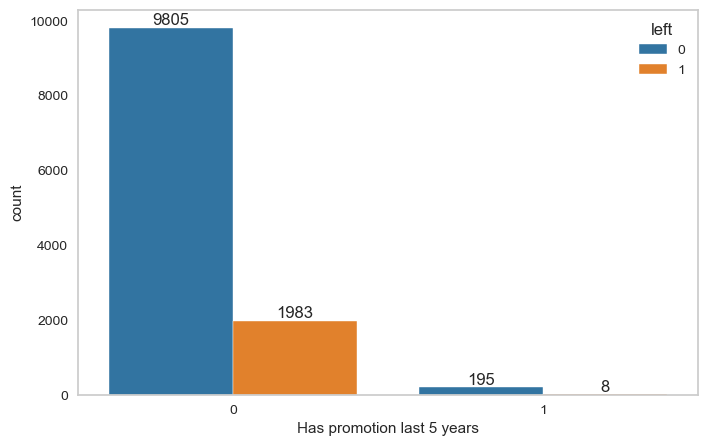

In [37]:
# Barplot to display the effect of the promotion last 5 years on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

### Departments

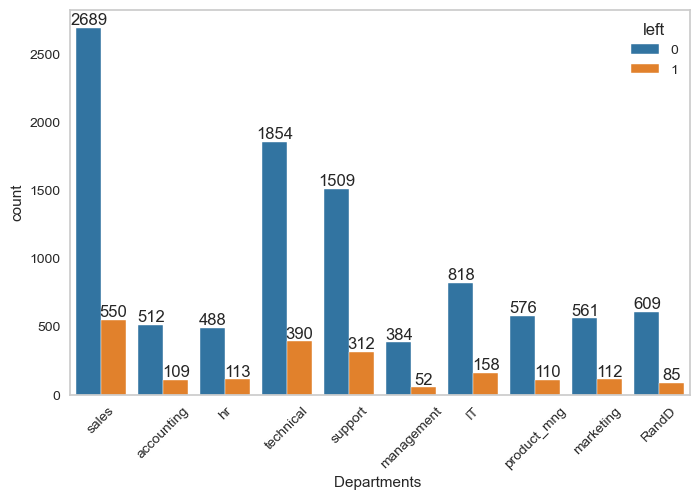

In [38]:
# Barplot to display the effect of the departments on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

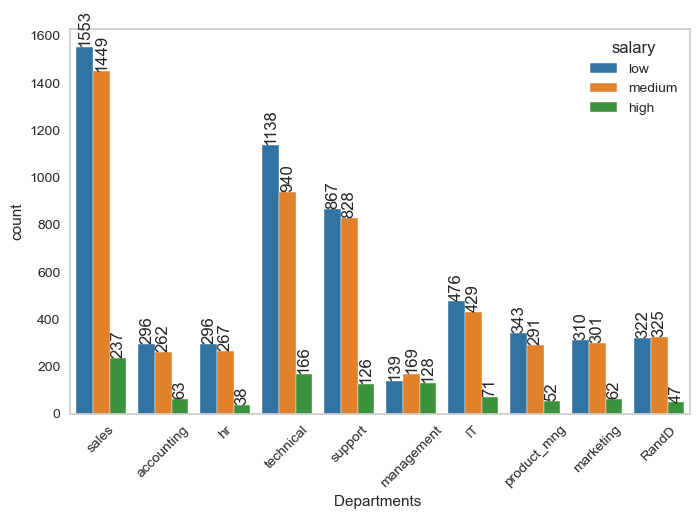

In [39]:
# Barplot to display the effect of the departments on the salary

plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="salary", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, rotation=90)

### Salary

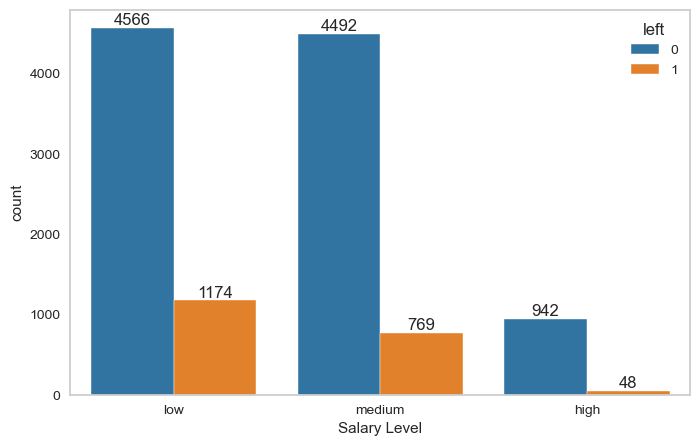

In [40]:
# Barplot to display the effect of the salary on the employees left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

### Subplots of Features

You can use the methods of the matplotlib.

#### Distribution of numerical features

In [41]:
numeric = df.select_dtypes(exclude="O").columns
numeric

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [42]:
df[numeric].head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  left  
0                   3              0                      0     1  
1                   6              0                      0     1  
2                   4              0                      0     1  
3                   5              0                      0     1  
4                   3              0                      0     1

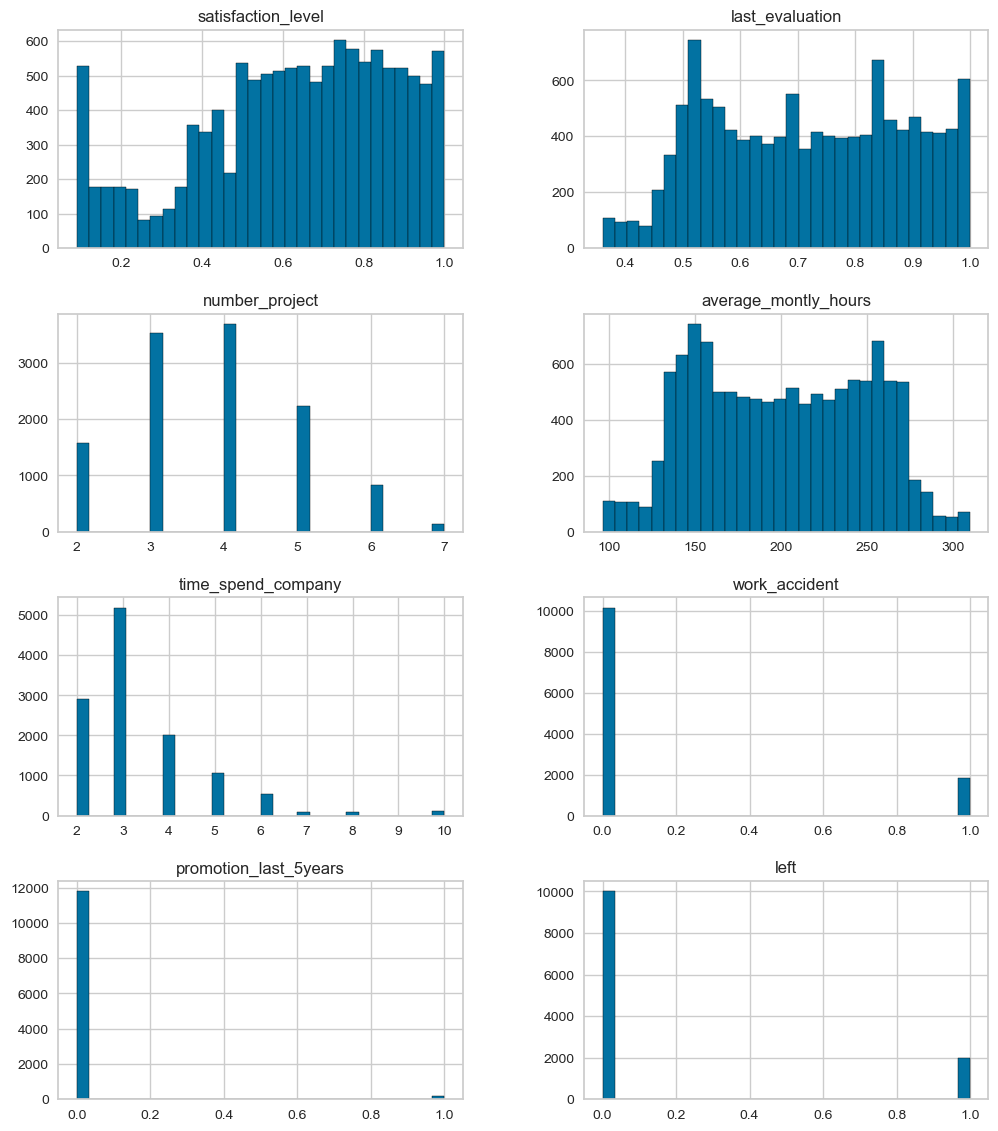

In [43]:
fig_ = df[numeric].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

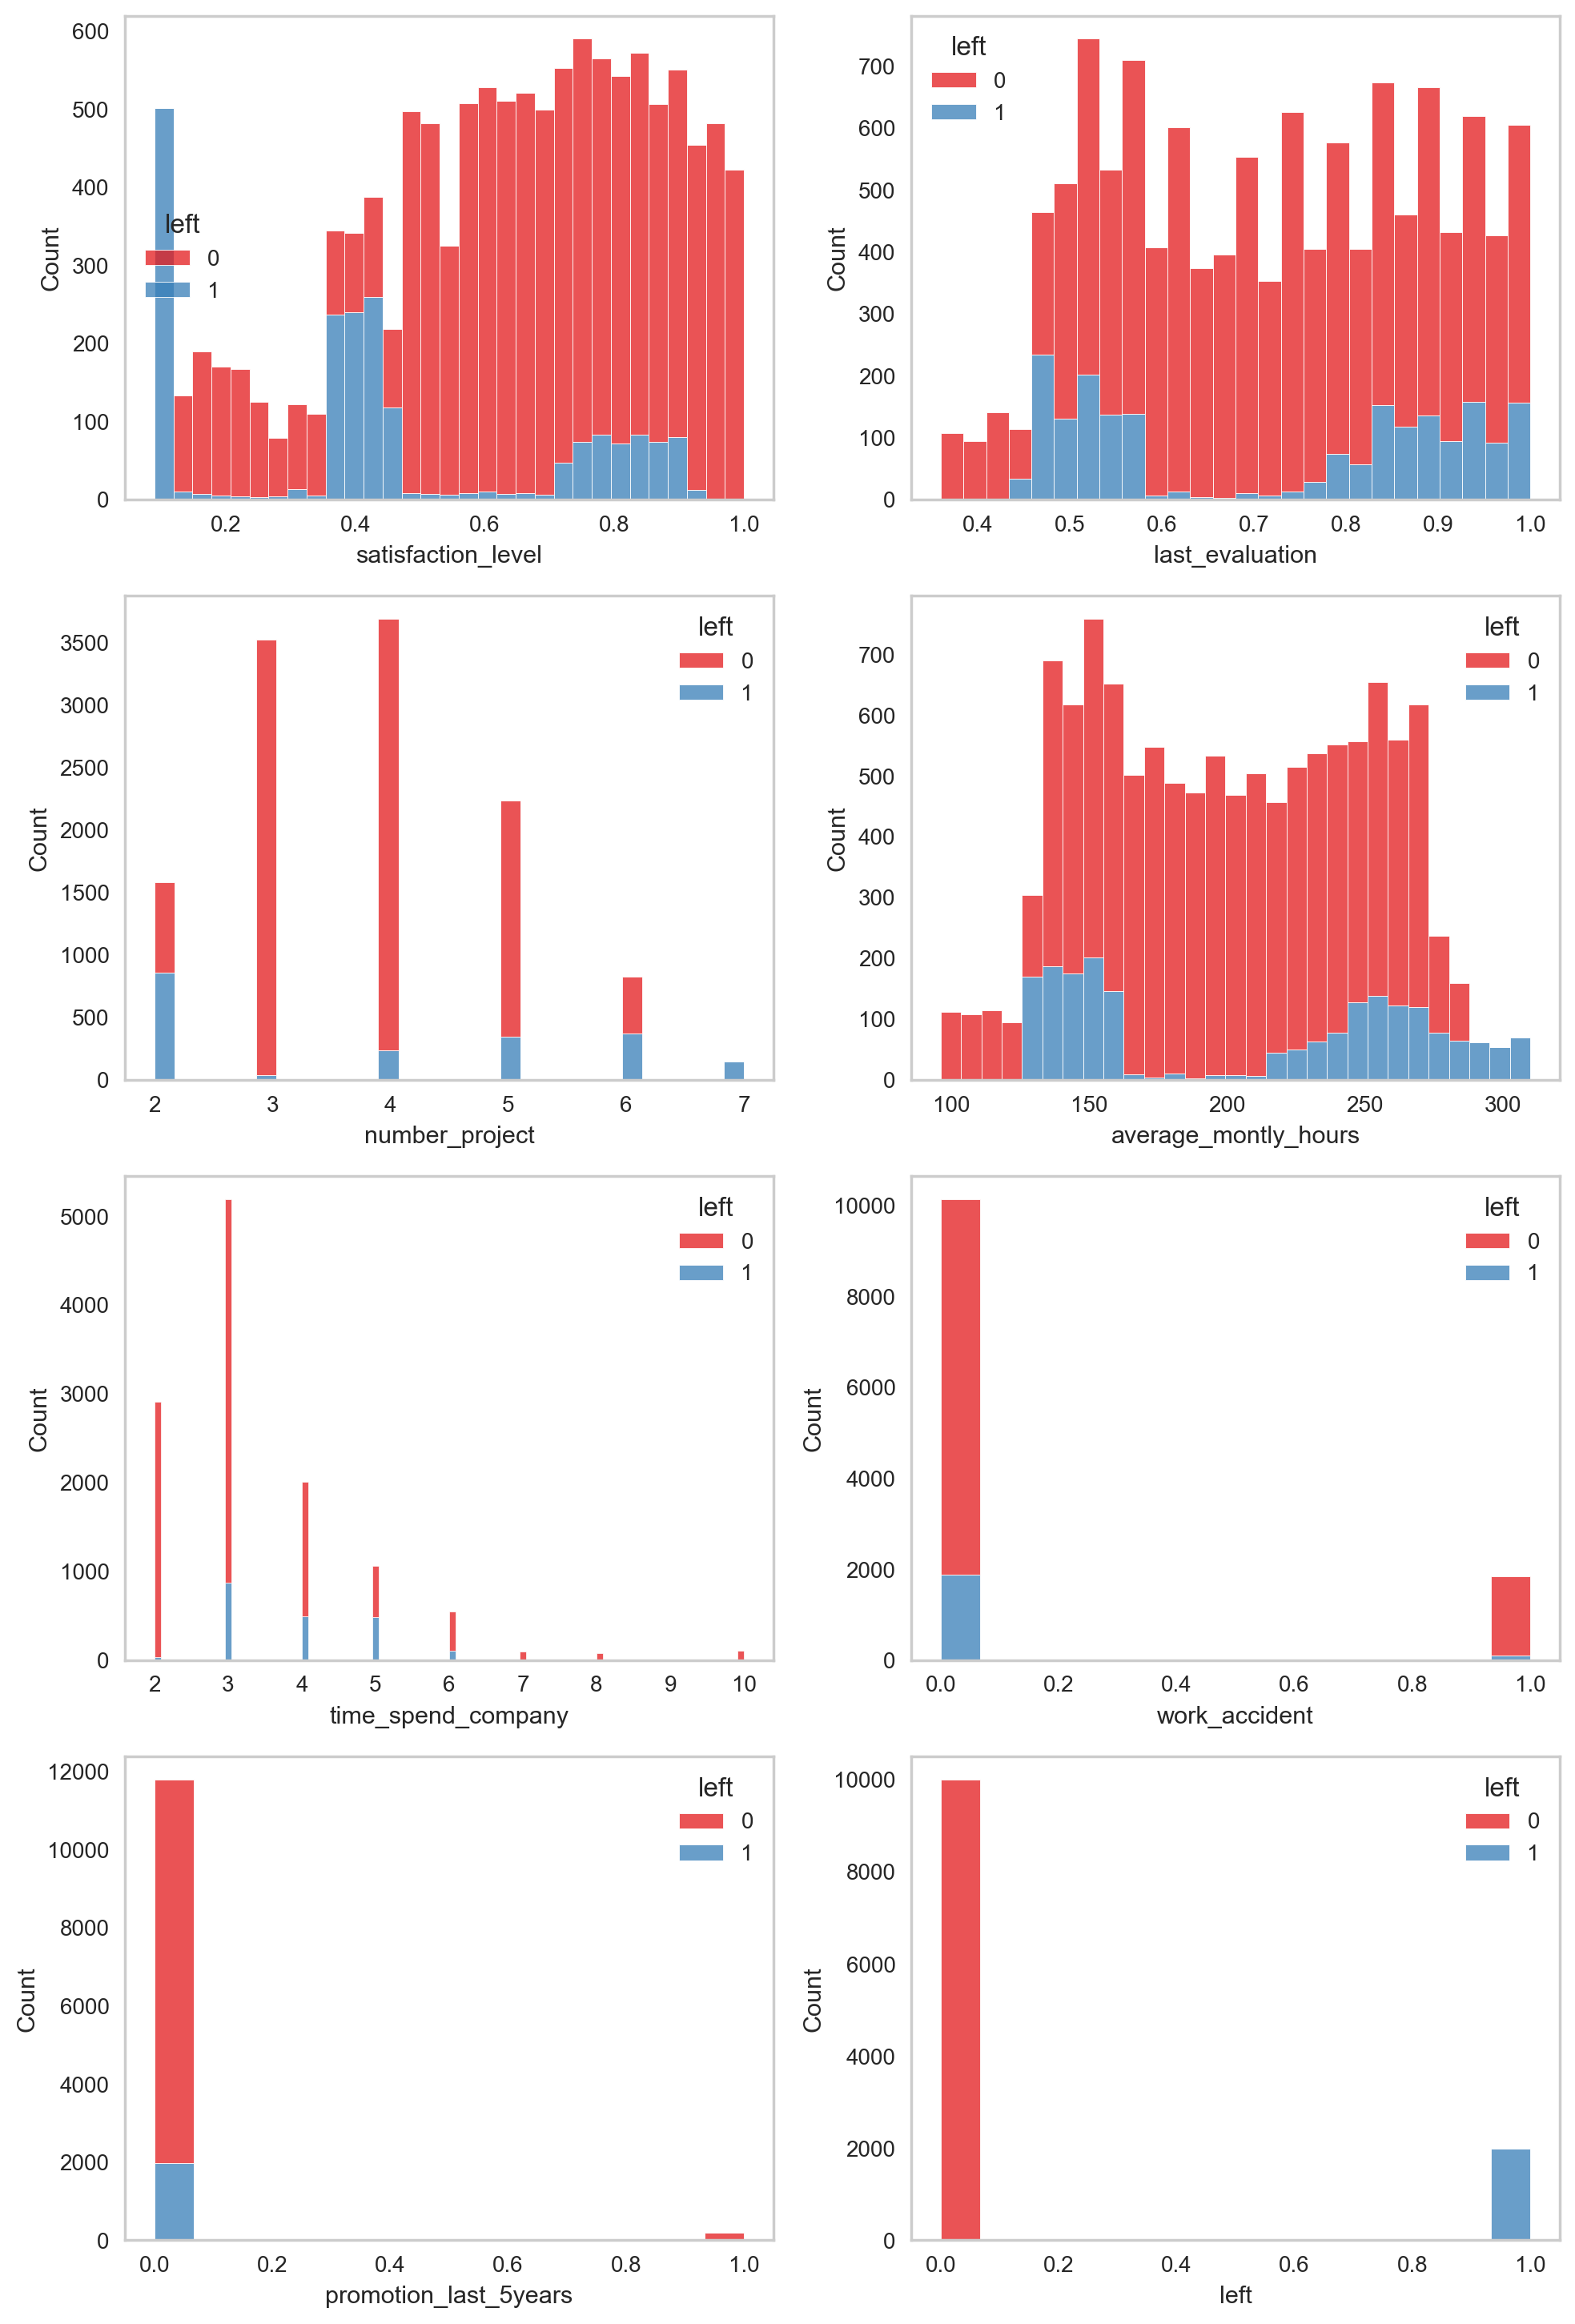

In [45]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="stack", palette="Set1"
                    )
plt.tight_layout();

#### Boxplots for numerical features based on the "left" feature

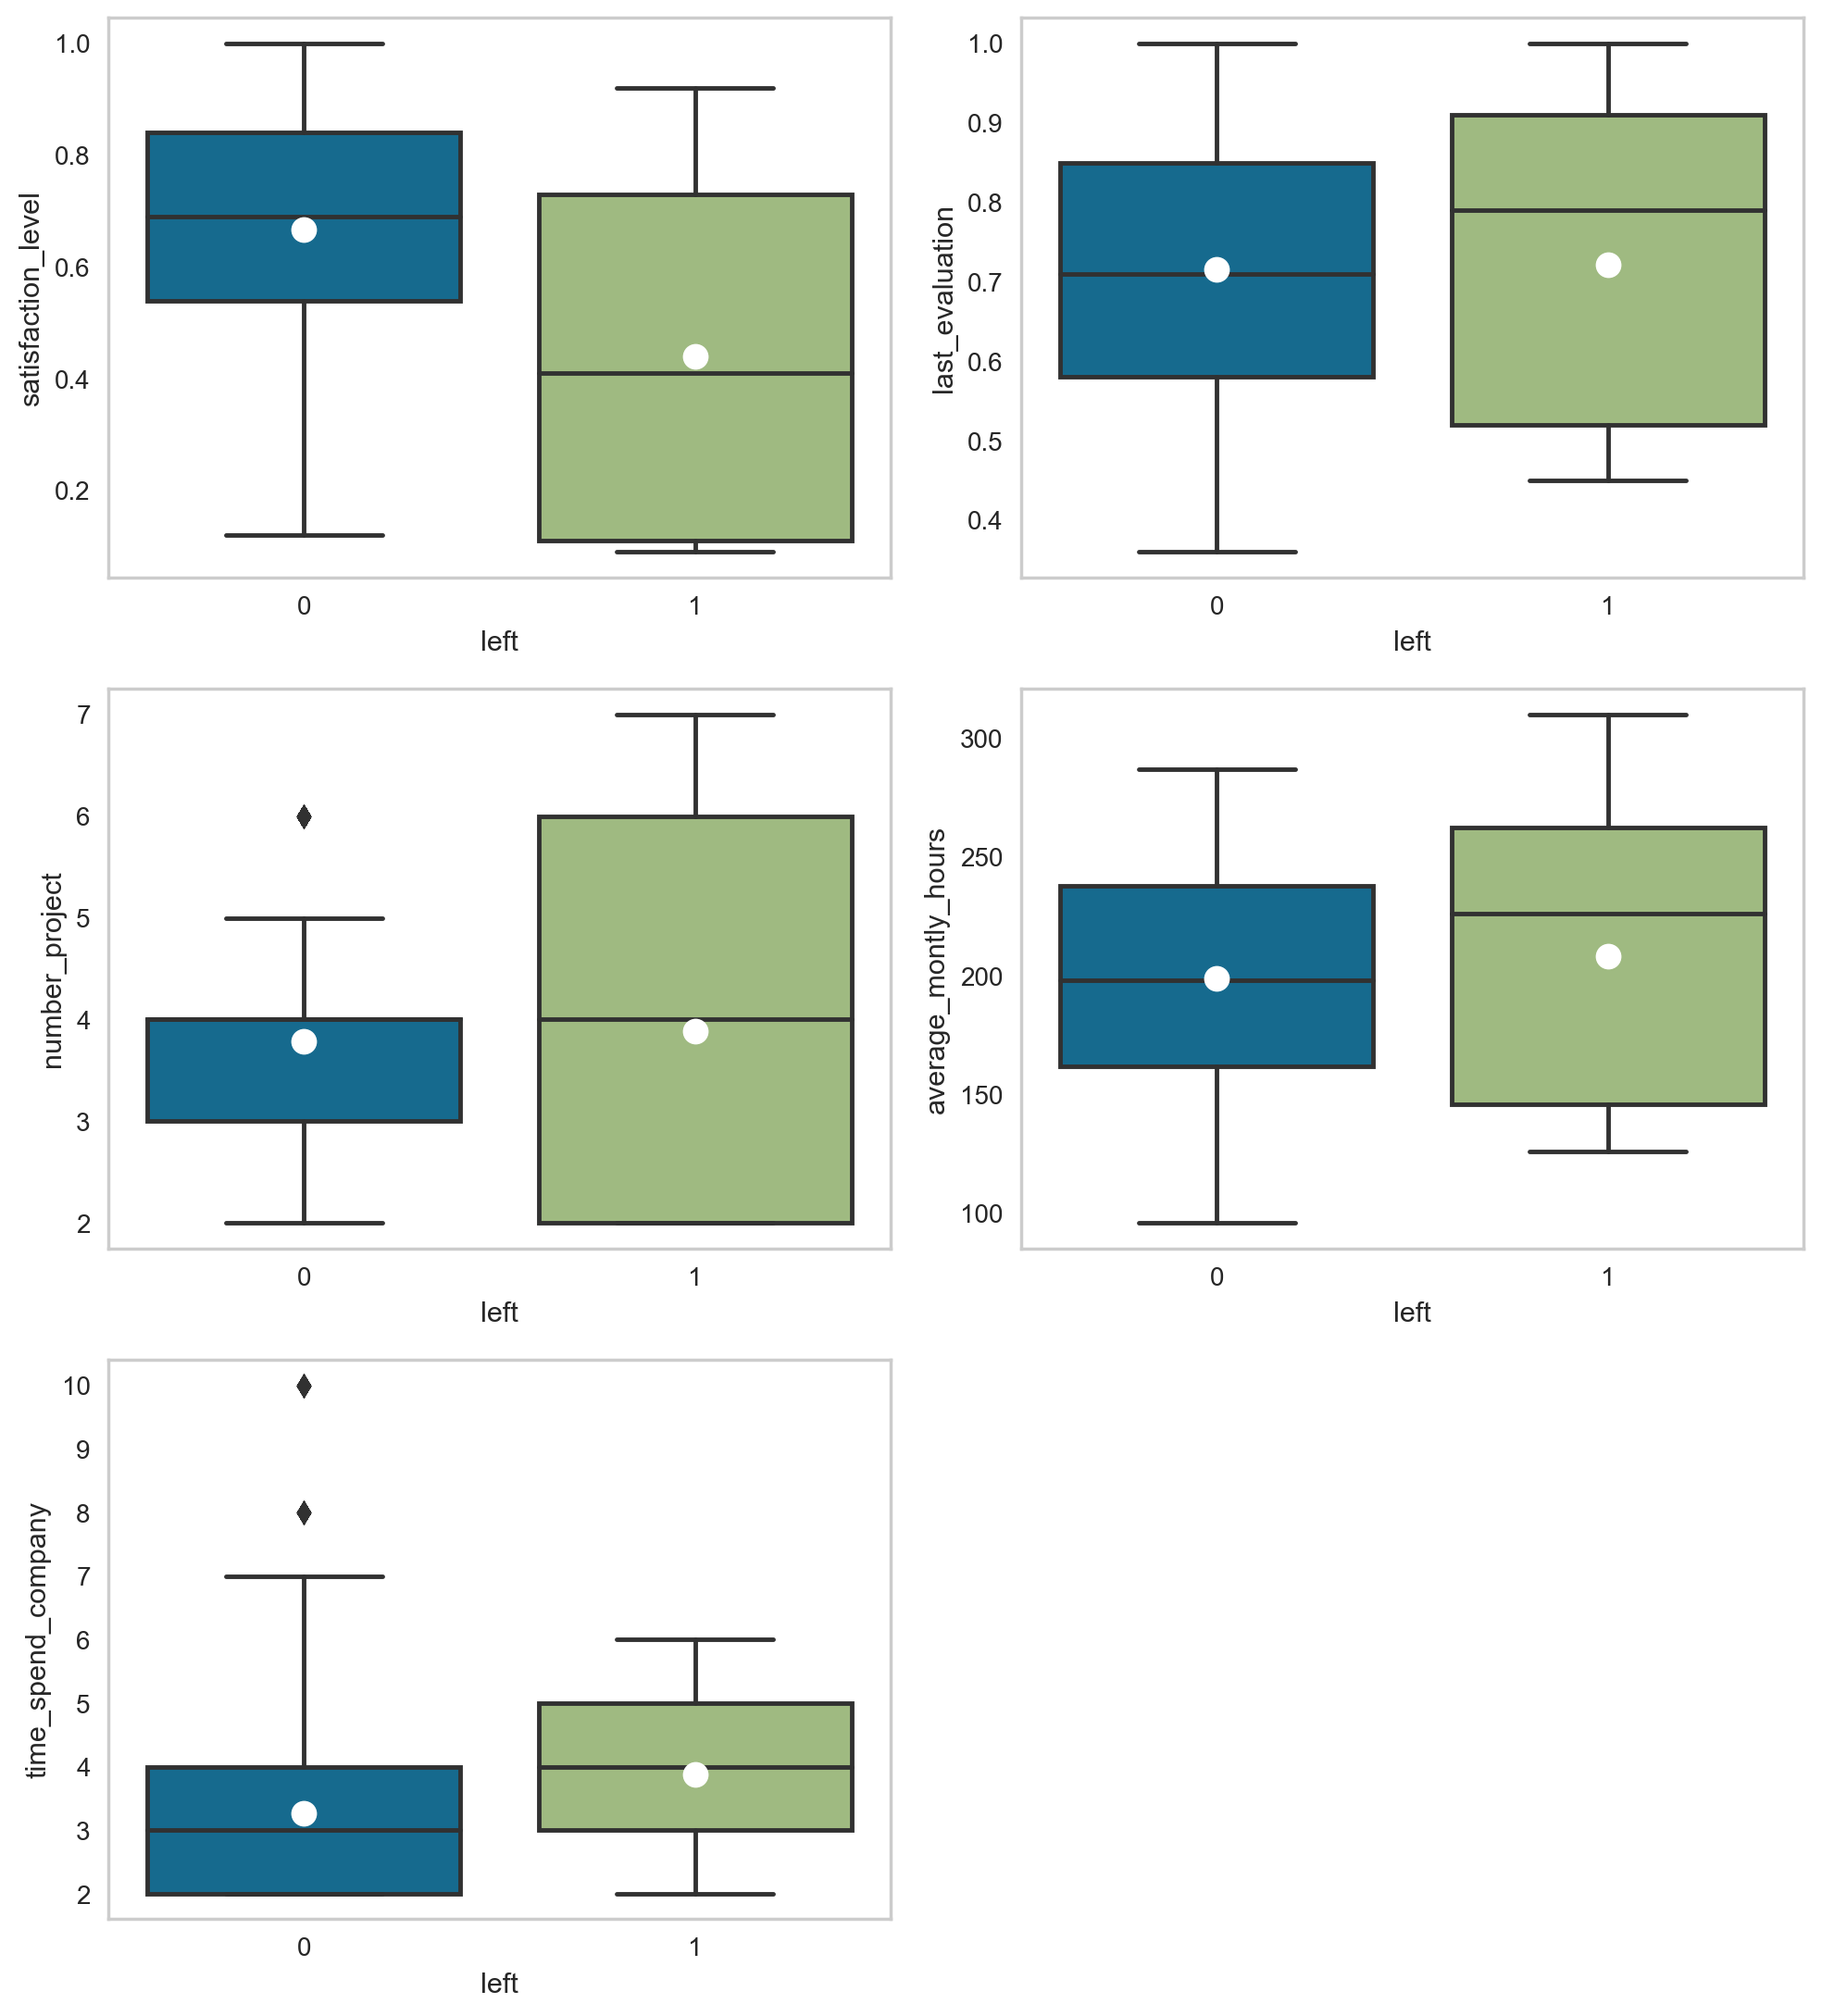

In [46]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

#### Pairplots for numerical features based on the "left" feature

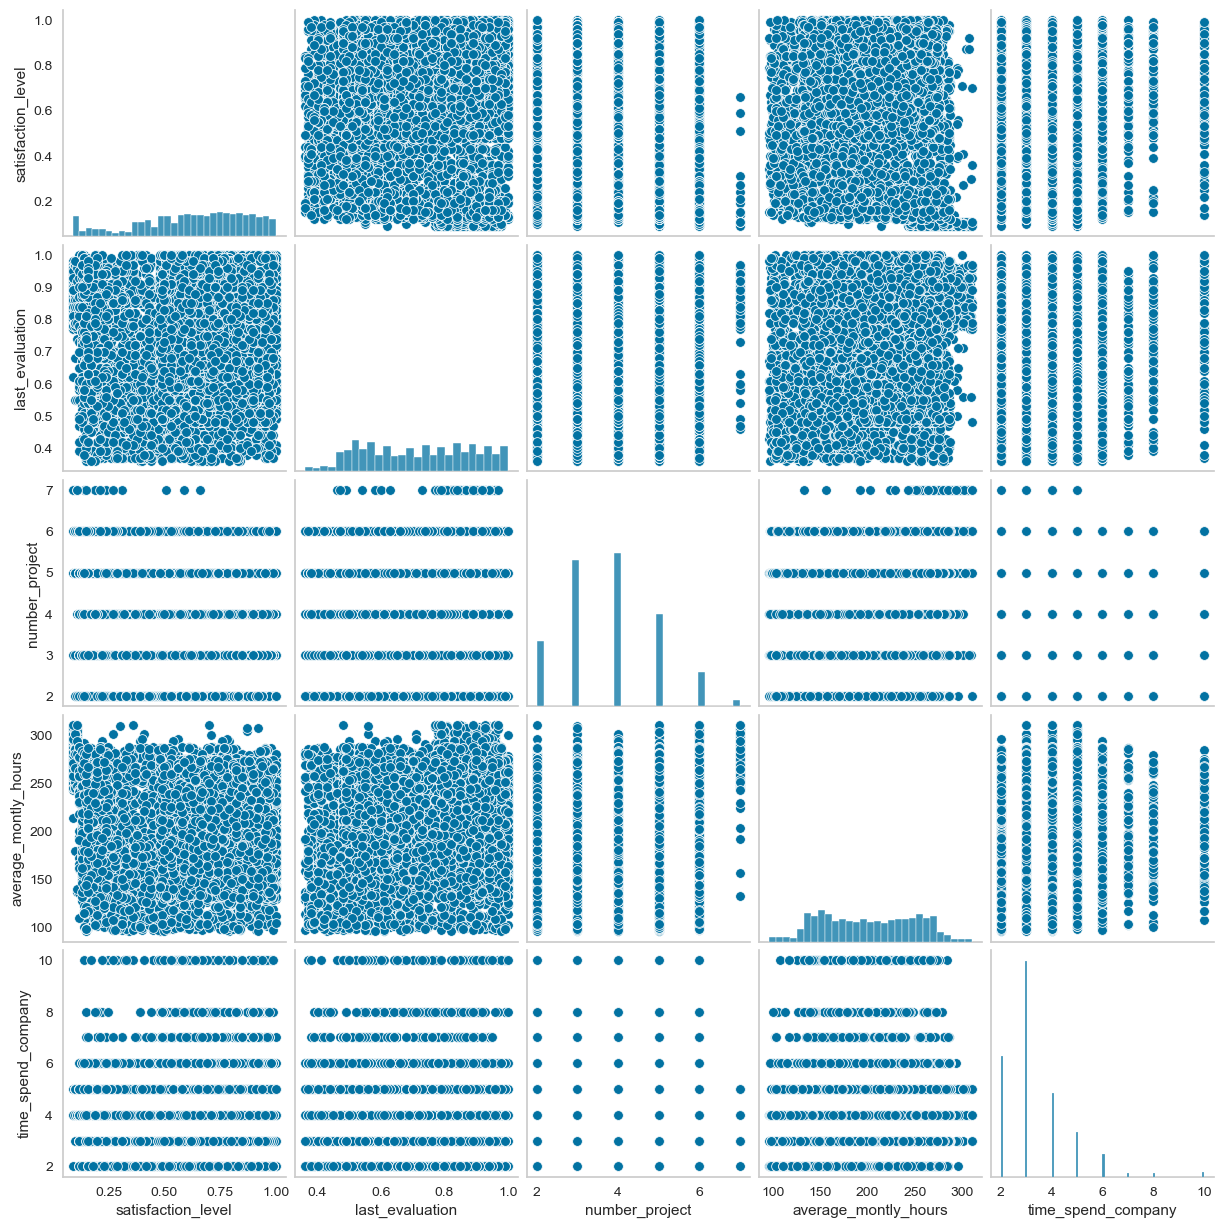

In [47]:
sns.pairplot(df[numeric].iloc[:,:-3]);

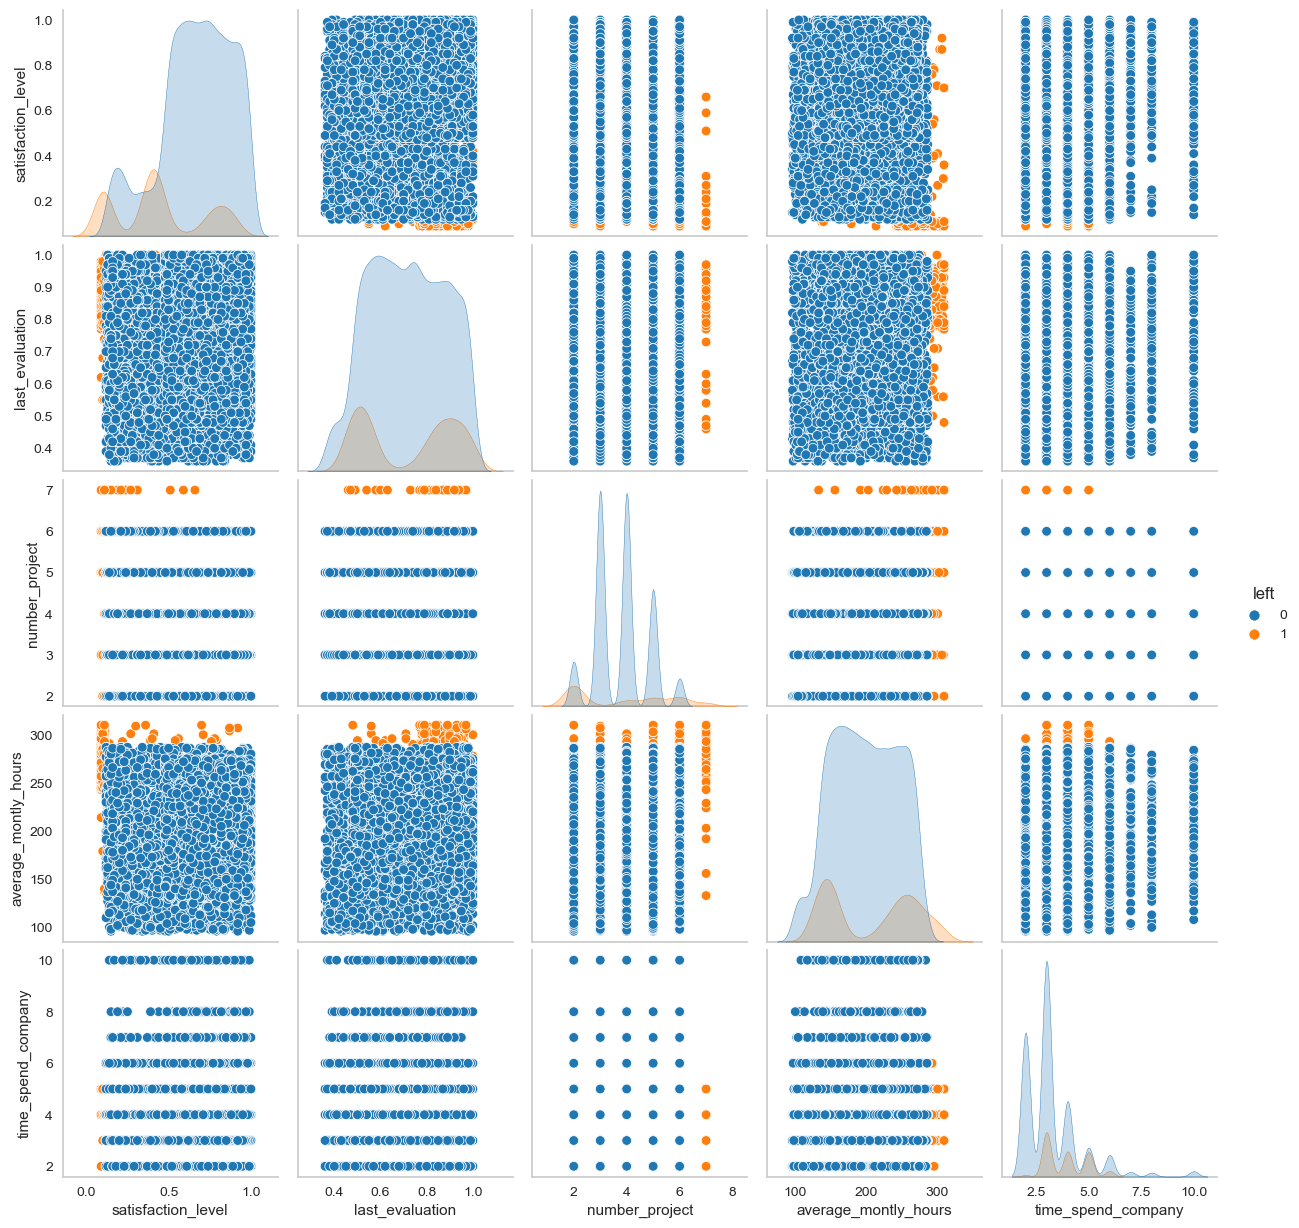

In [48]:
sns.pairplot(df[numeric].iloc[:, [0,1,2,3,4,7]], hue="left", palette="tab10" );

#### Heatmap for numerical features based on the "left" feature

In [49]:
df.corr().style.background_gradient(cmap='YlGnBu')

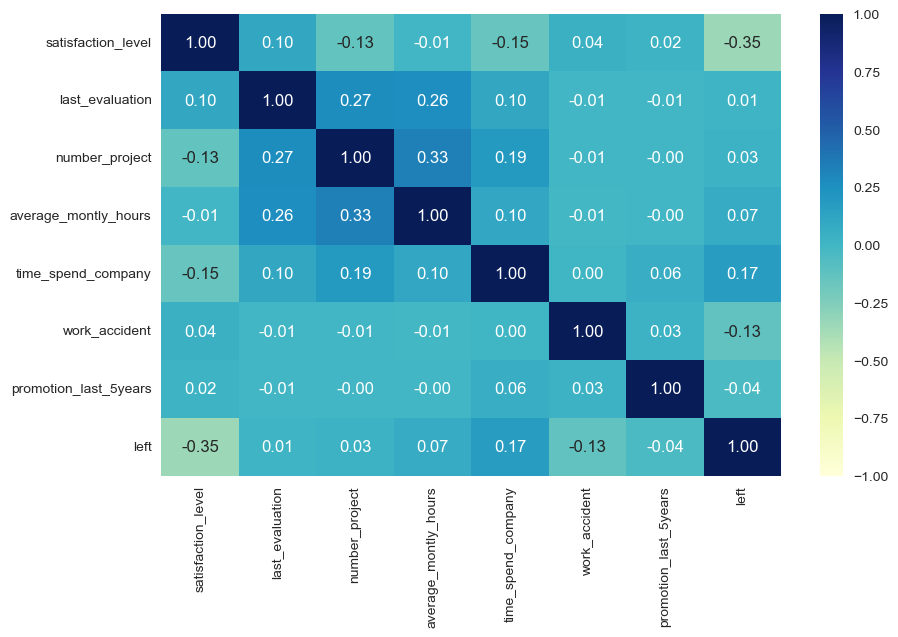

In [59]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu");

##  Data Pre-Processing

### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [60]:
# create a copy of df for further use

df_new = df.copy()

In [61]:
# defining a random state

random_state=101

In [62]:
# select categorical column names

cat = df.select_dtypes("O").columns
cat

Index(['departments', 'salary'], dtype='object')

In [64]:
# defining ordinal encoder object and implement it to categorical columns

enc = OrdinalEncoder()
enc.fit_transform(df[cat])

array([[7., 1.],
       [7., 2.],
       [7., 2.],
       ...,
       [4., 0.],
       [5., 0.],
       [0., 1.]])

In [66]:
# Ordinal encoding of categorical columns

df_new[cat] = enc.fit_transform(df[cat])
df_new

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  departments  salary  left  
0                          0         7.00    1.00     1  
1                          0         7.00    2.00     1  
2                          0         7.00    2.00     1  
3                          0         7.00    1.00     1  
4                          0         7.00    1.00     1  
...                      ...          ...     ...   ...  
11986                      1         4.00    0.00     0  
11987                      1         4.00    0.00     0  
11988                      1         4.00    0.00     0  
11989                      1         5.00    0.00     0  
11990                      0         0.00    1.00     0  

[11991 rows x 10 columns]

### Scaling

In [72]:
# defining a scaler object

scaler = MinMaxScaler()

In [68]:
# defining X and y

X = df_new.drop(columns="left", axis=1)
y = df_new["left"]

In [73]:
# scaling X before cluster analysis

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.77777778,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.77777778,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 1.        , 0.44444444,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 1.        , 0.55555556,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.5       ]])

## Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [74]:
# import the hopkins method to calculate the cluster tendency of the data

from pyclustertend import hopkins

In [76]:
hopkins(X_scaled, X_scaled.shape[0])

0.18600610222796868

In [77]:
# import the KMeans method and create an instance of KMeans

from sklearn.cluster import KMeans

model1 = KMeans(n_clusters=2, random_state=42)

In [238]:
# model.fit_predict(X)

In [86]:
# fitting the KMeans model using X_scaled data

model1.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [80]:
#getting labels from model

model1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
# adding labels to the X dataframe

X["labels"] = model1.labels_

In [83]:
X

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  departments  salary  labels  
0                          0         7.00    1.00       0  
1                          0         7.00    2.00       0  
2                          0         7.00    2.00       0  
3                          0         7.00    1.00       0  
4                          0         7.00    1.00       0  
...                      ...          ...     ...     ...  
11986                      1         4.00    0.00       1  
11987                      1         4.00    0.00       0  
11988                      1         4.00    0.00       0  
11989                      1         5.00    0.00       0  
11990                      0         0.00    1.00       0  

[11991 rows x 10 columns]

In [84]:
# adding left values to the X dataframe

X["left"] = y

In [85]:
# checking the labels we got from KMeans and left values by crosstab (comparison of actual left values with predicted labels)

ct = pd.crosstab(X.left, X.labels)
ct

labels     0     1
left              
0       8255  1745
1       1886   105

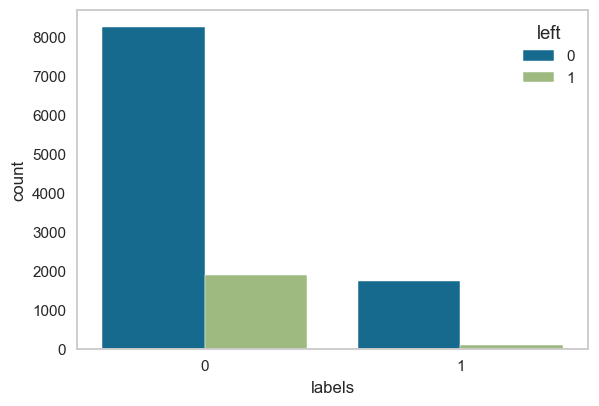

In [99]:
# comparison of predicted labes with left values for 2 cluster

plt.figure(figsize=(6,4), dpi=110)
sns.countplot(data= X, x="labels",hue= X["left"]);

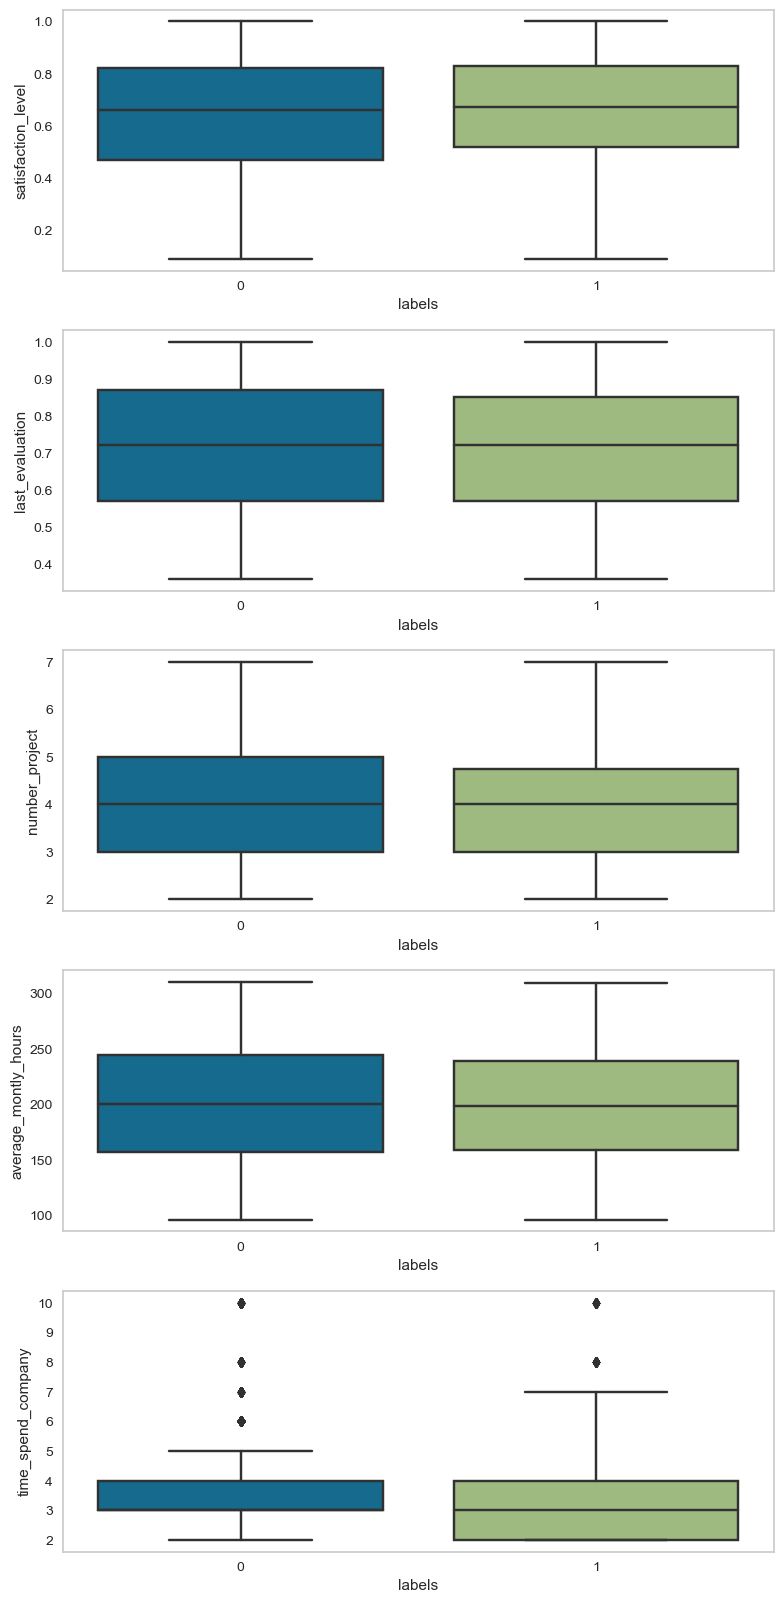

In [108]:
plt.figure(figsize=(8,35), dpi=100)
for i, j in enumerate(X.iloc[:,:5].columns):
    plt.subplot( len(X.columns),1, i+1)
    sns_plot = sns.boxplot(data = X,x =X.labels, y=X[j])
    fig = sns_plot.get_figure()
plt.tight_layout();

- As it's seen, 2 clusters are not enough to separate the employees. Probably, the reason is both the data is imbalance and the features are insufficient to group them.

### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [247]:
X = X.drop(columns=["left"])

In [109]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

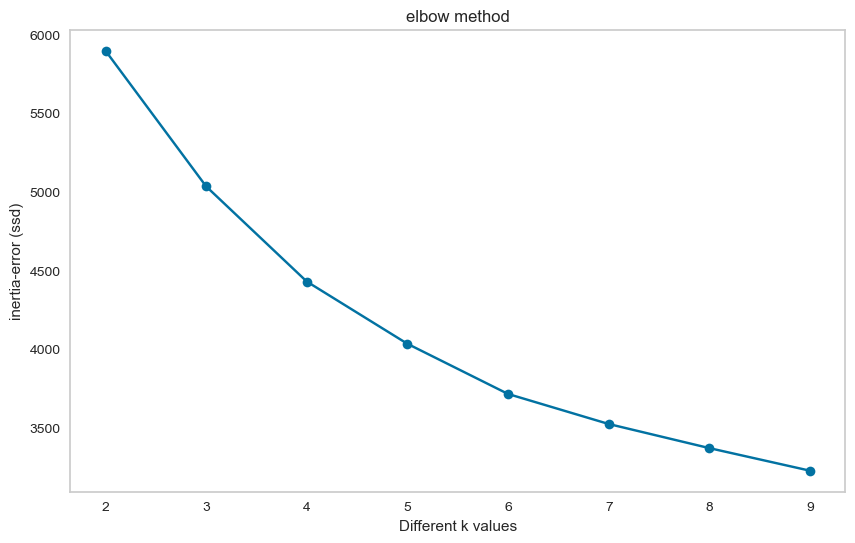

In [110]:
# elbow plot 
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [111]:
ssd

[5897.423660642249,
 5034.585745757345,
 4429.507024196925,
 4033.589728451915,
 3714.591755601912,
 3523.629649050369,
 3370.291744051192,
 3226.618212233517]

In [112]:
pd.Series(ssd).diff()

0       NaN
1   -862.84
2   -605.08
3   -395.92
4   -319.00
5   -190.96
6   -153.34
7   -143.67
dtype: float64

In [113]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1    NaN
2 862.84
3 605.08
4 395.92
5 319.00
6 190.96
7 153.34
8 143.67

<AxesSubplot:>

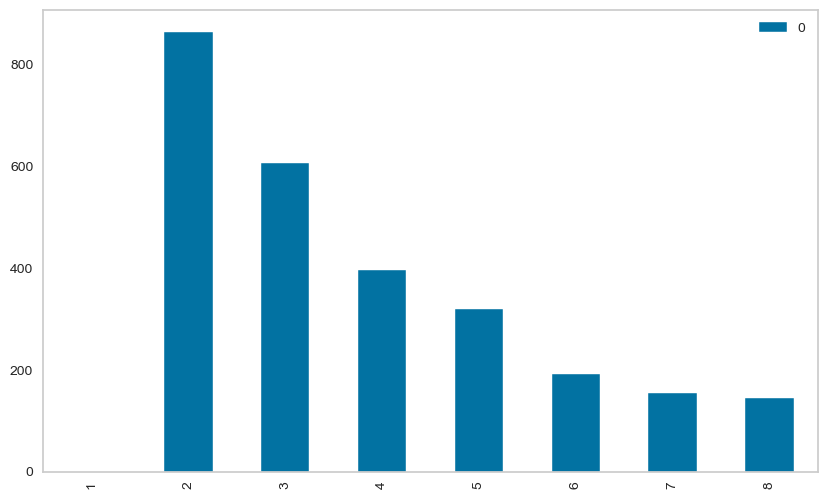

In [114]:
df_diff.plot(kind='bar');

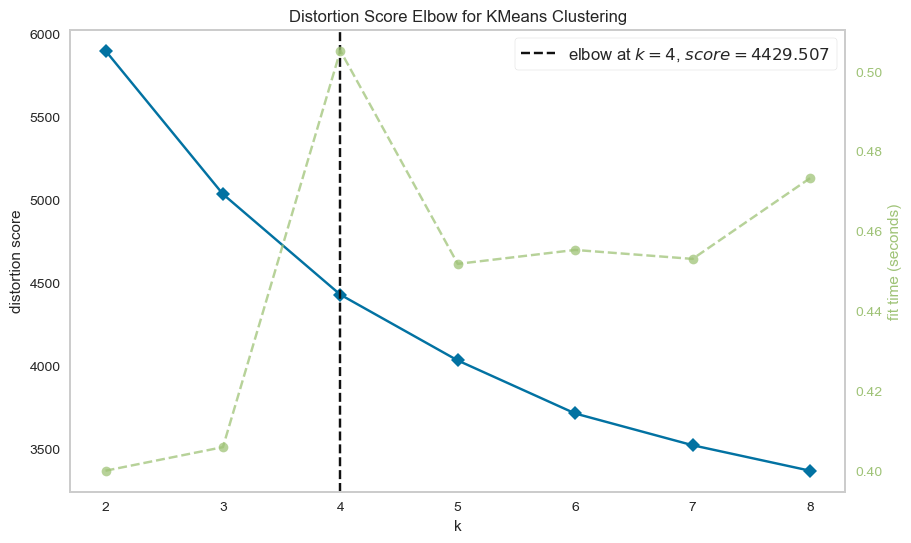

In [115]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(n_clusters=4,random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Silhouette Analysis

In [116]:
# importing silhouette_score from sklearn library

from sklearn.metrics import silhouette_score

In [117]:
silhouette_score(X_scaled, model.labels_)

0.19333934661621532

In [119]:
# checking the silhouette score for different cluster numbers

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3206987112924166
For n_clusters=3, the silhouette score is 0.22209922292746462
For n_clusters=4, the silhouette score is 0.19906746316679588
For n_clusters=5, the silhouette score is 0.2104284668094636
For n_clusters=6, the silhouette score is 0.20806797026856516
For n_clusters=7, the silhouette score is 0.20922917244172812
For n_clusters=8, the silhouette score is 0.2049820407574877


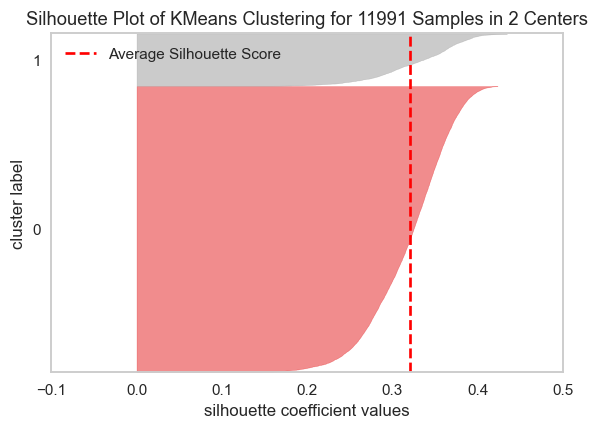

In [136]:
# silhouette plot for 2 cluster
plt.figure(figsize=(6,4), dpi=110)
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

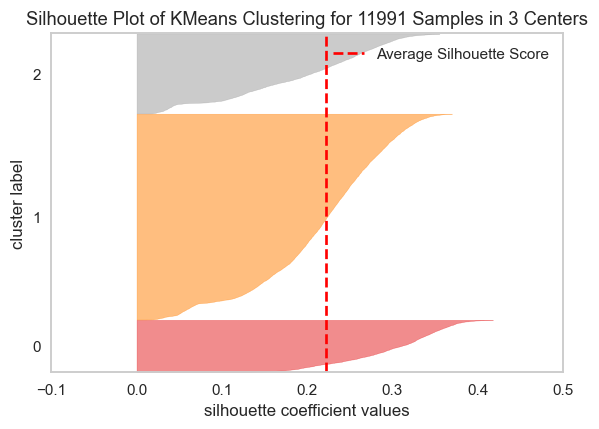

In [135]:
# silhouette plot for 3 cluster
plt.figure(figsize=(6,4), dpi=110)
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

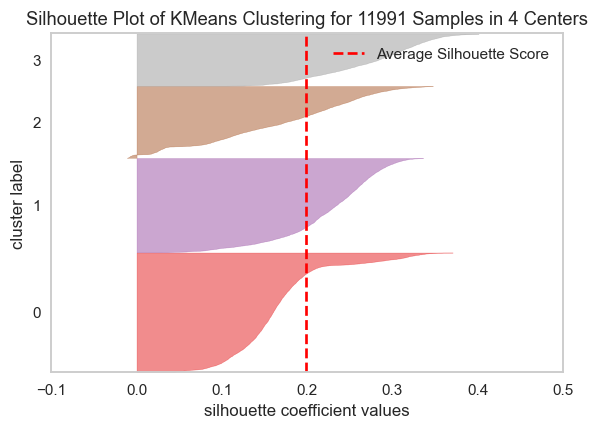

In [134]:
# silhouette plot for 4 cluster

plt.figure(figsize=(6,4), dpi=110)
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Conclusion

In [123]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0         7.00   
1                   6              0                      0         7.00   
2                   4              0                      0         7.00   
3                   5              0                      0         7.00   
4                   3              0                      0         7.00   

   salary  labels  left  
0    1.00       0     1  
1    2.00       0     1  
2    2.00       0     1  
3    1.00       0     1  
4    1.00       0     1

In [124]:
# As it is seen from the silhouette analysis, it is bettet to make 2 or 3 cluster.
# Firstly we make 3 cluster and evaluate the results of it. 

# creating KMeans model instance with 3 clusters
model2 = KMeans(n_clusters=3, random_state=42)

In [125]:
# prediction the labels from the model

model2.fit_predict(X_scaled)

array([1, 1, 1, ..., 2, 1, 2])

In [126]:
# adding left and predicted values to the X dataframe

X["left"] = y
X["predicted"] = model2.labels_

In [127]:
# checking the value counts of predicted labels

X.predicted.value_counts()

1    7310
2    2831
0    1850
Name: predicted, dtype: int64

In [128]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0         7.00   
1                   6              0                      0         7.00   
2                   4              0                      0         7.00   
3                   5              0                      0         7.00   
4                   3              0                      0         7.00   

   salary  labels  left  predicted  
0    1.00       0     1          1  
1    2.00       0     1          1  
2    2.00       0     1          1  
3    1.00       0     1          1  
4    1.00       0     1          1

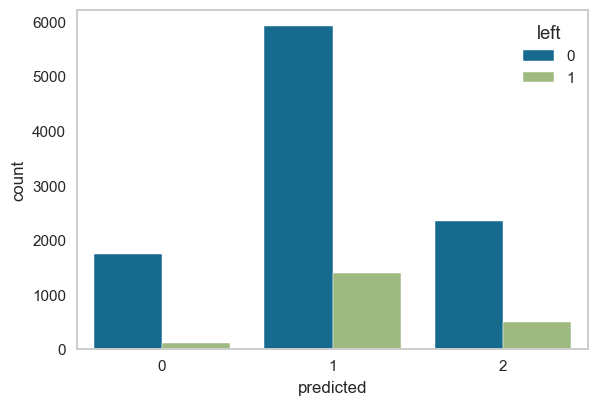

In [133]:
# comparison of predicted labes with left values

plt.figure(figsize=(6,4), dpi=110)
sns.countplot(data = X, x="predicted",hue=X.left);

In [131]:
# cross table to compare predicted and left labels

ct = pd.crosstab(X.left, X.predicted)
ct

predicted     0     1     2
left                       
0          1745  5913  2342
1           105  1397   489

In [132]:
# comparison the actual left values with predicted labels

df_new.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

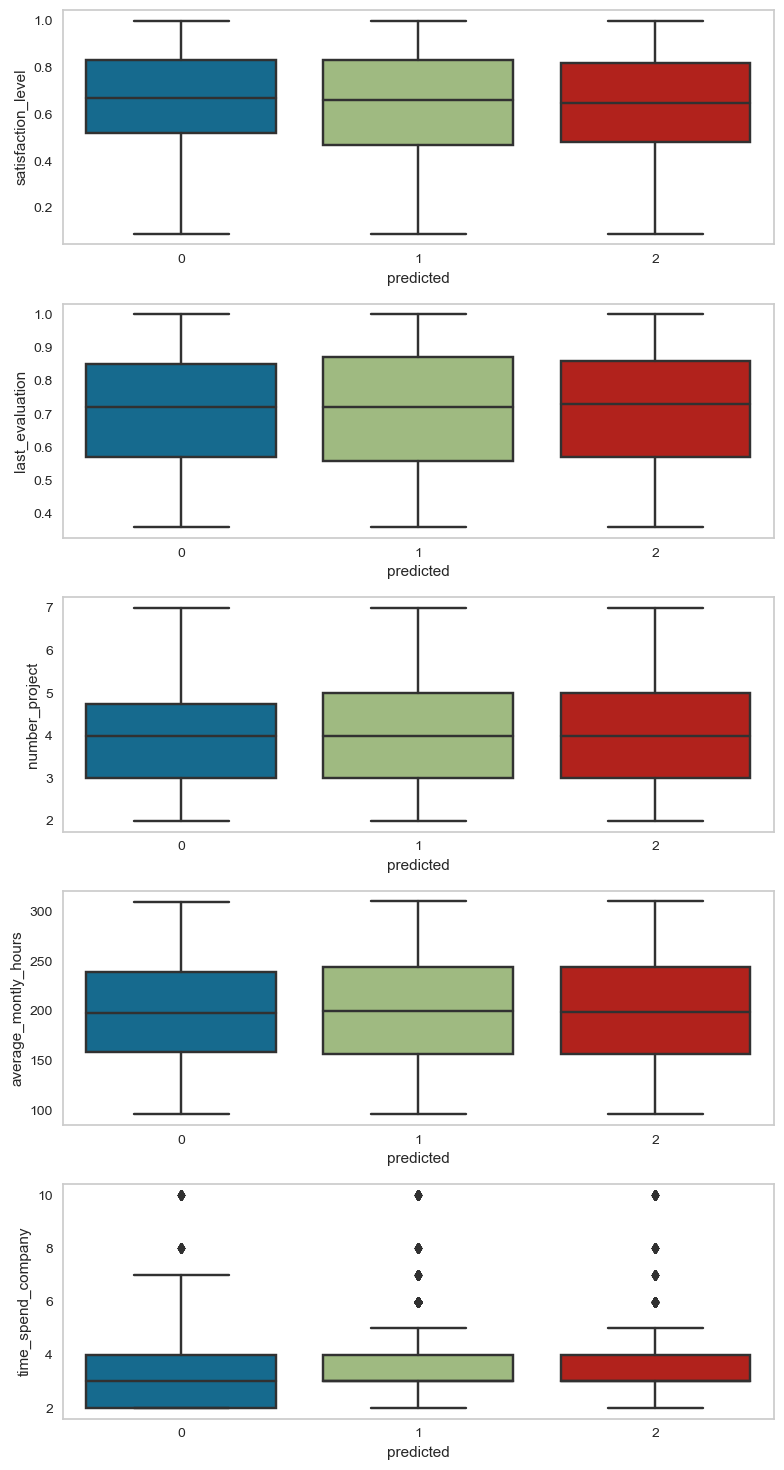

In [138]:
# checking the effects of features on predicted labels

plt.figure(figsize=(8,35), dpi=100)
for i, j in enumerate(X.iloc[:,:5].columns):
    plt.subplot( len(X.columns),1, i+1)
    sns_plot = sns.boxplot(data = X,x =X.predicted, y=X[j])
    fig = sns_plot.get_figure()
plt.tight_layout();
# fig.savefig("ClusterStdSc.png")

- Employees labeled with 1 occurs from left employees mostly. So, we can say the employees who working for more than average hours in a month, building average number of projects, having well last evaluation and satisfaction level tend to leave. We can name they as "Lost Employees".
- Employees labeled with 1 and 2 look like employees stayed in the company and their satisfaction level, last evaluation, number of projects, average monthly hours and time spend company pattern are almost the same. We can name them as "Loyal Employees"
<br>

From the insight of these classes, the company has to make better evaluations or lesson the job burden, to hold the employees. 

*However, we have to emphasize that this clustering is not enough to make a perfect insight. It is just a taking a glance.*

## Model Building

### Split Data as Train and Test Set

In [307]:
X = df.drop(columns="left")
y = df.left
X.shape, y.shape

((11991, 9), (11991,))

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify = y)

In [309]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9592, 9)
Train target shape   :  (9592,)
Test features shape  :  (2399, 9)
Test target shape    :  (2399,)


### Implement Lazypredict

In [102]:
# ! pip install pyforest
# ! pip install lazypredict

In [144]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [145]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:18<00:00,  1.55it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.97     0.97      0.99   
BaggingClassifier                  0.98               0.96     0.96      0.98   
RandomForestClassifier             0.99               0.96     0.96      0.99   
XGBClassifier                      0.98               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.96   
SVC                                0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.98               0.95     0.95      0.98   
KNeighborsClassifier               0.95               0.94     0.94      0.95   
LabelSpreading                     0.95               0.93     0.93      0.95   
LabelPropagation                   0.95               0.93     0.93      0.95   
AdaBoostClassifier                 0.96               0.93     0.93      0.96   
ExtraTreeClassifier                0.93               0.90     0.90      0.94   
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.86   
GaussianNB                         0.73               0.75     0.75      0.76   
NearestCentroid                    0.76               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.83               0.60     0.60      0.81   
PassiveAggressiveClassifier        0.75               0.60     0.60      0.76   
CalibratedClassifierCV             0.84               0.60     0.60      0.81   
LogisticRegression                 0.84               0.59     0.59      0.81   
LinearSVC                          0.84               0.57     0.57      0.80   
RidgeClassifier                    0.85               0.56     0.56      0.80   
RidgeClassifierCV                  0.85               0.56     0.56      0.80   
Perceptron                         0.58               0.56     0.56      0.63   
BernoulliNB                        0.83               0.56     0.56      0.79   
DummyClassifier                    0.83               0.50     0.50      0.76   
SGDClassifier                      0.83               0.50     0.50      0.76   

                               Time Taken  
Model                                      
LGBMClassifier                       0.18  
BaggingClassifier                    0.28  
RandomForestClassifier               0.88  
XGBClassifier                        1.77  
DecisionTreeClassifier               0.07  
SVC                                  1.18  
ExtraTreesClassifier                 0.97  
KNeighborsClassifier                 0.17  
LabelSpreading                       5.83  
LabelPropagation                     3.54  
AdaBoostClassifier                   0.48  
ExtraTreeClassifier                  0.04  
QuadraticDiscriminantAnalysis        0.06  
GaussianNB                           0.04  
NearestCentroid                      0.03  
LinearDiscriminantAnalysis           0.12  
PassiveAggressiveClassifier          0.05  
CalibratedClassifierCV               2.10  
LogisticRegression                   0.09  
LinearSVC                            0.54  
RidgeClassifier                      0.06  
RidgeClassifierCV                    0.04  
Perceptron                           0.04  
BernoulliNB                          0.04  
DummyClassifier                      0.02  
SGDClassifier                        0.08

### Define Useful Functions for Models

In [146]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [147]:
# defining a function to compare evaluation metrics of models and to create a dataframe for further model comparison

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', ml_model=True, average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    if ml_model: # for ML models
      y_pred_test = model.predict(X_test)
      y_pred_train = model.predict(X_train)
    else: # for ANN models
      y_pred_test = model.predict(X_test) >= 0.5
      y_pred_train = model.predict(X_train) >= 0.5
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(7, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[0]);
    print("\n"*1, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

## Distance Based Algorithm

### Data Preprocessing 

In [310]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

scaler = MinMaxScaler()

# defining make_column_transformer instance to implement onehot encoding to the departments feature and
# ordinal encoding to the salary feature

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), ["departments"]),
                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["salary"]),
                                       remainder='passthrough')

### SVC Model

#### Model Building

In [311]:
#defining operations which will be used in pipeline
operations_svc = [("column_trans", column_trans),
                  ('scaler', scaler),
                  ("svc", SVC(class_weight="balanced",
                              probability=True,
                              random_state=random_state))]

# built a SVC pipe model with default hyperparameters
pipe_svc_model = Pipeline(steps=operations_svc)

In [312]:
# fit the SVC pipe model on train data
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(class_weight='balanced', probability=True,
                     random_state=101))])

In [313]:
#evaluation metrics for SVC pipe model
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[1852  149]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2001
           1       0.71      0.92      0.80       398

    accuracy                           0.93      2399
   macro avg       0.85      0.93      0.88      2399
weighted avg       0.94      0.93      0.93      2399


Train_Set
[[7526  473]
 [ 124 1469]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7999
           1       0.76      0.92      0.83      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.93      0.90      9592
weighted avg       0.95      0.94      0.94      9592



#### SVC Model Cross Validation

In [314]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# defining scoring variable
scoring= ["accuracy", "f1", "recall", "precision"]

# reset the pipe SVC model
model = Pipeline(steps=operations_svc)

# built cross_validate object
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      7.61        0.52           0.93            0.94     0.81      0.83   
1      7.83        0.62           0.93            0.93     0.82      0.82   
2      7.54        0.53           0.93            0.94     0.81      0.83   
3      7.73        0.58           0.94            0.93     0.83      0.82   
4      7.71        0.45           0.93            0.94     0.82      0.83   

   test_recall  train_recall  test_precision  train_precision  
0         0.90          0.93            0.74             0.76  
1         0.92          0.92            0.74             0.74  
2         0.91          0.92            0.72             0.75  
3         0.92          0.92            0.75             0.75  
4         0.92          0.92            0.75             0.75

test_accuracy     0.93
train_accuracy    0.94
test_f1           0.82
train_f1          0.83
test_recall       0.91
train_recall      0.92
test_precision    0.74
train_precision   0.75
dtype: float64

#### SVC Model GridsearchCV

In [331]:
operations_svc = [("column_trans", column_trans),('scaler', scaler), 
                  ("svc", SVC(class_weight="balanced",probability=True, random_state=random_state))]

model = Pipeline(steps=operations_svc)

# defining grid parameters which will be used for hyperparameters tuning
param_grid = {'svc__C': [0.1, 1, 10],
              'svc__gamma': ["scale", "auto", 1, 0.1],
#             'svc__kernel': ['poly', 'rbf'], # ['linear', 'poly', 'rbf']
#             'svc__degree': [2,3]
}

# built the grid SVC model
grid_svc_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring="f1",  # as the data imbalance we decided to use f1_score in grid search
                              n_jobs=-1)

In [332]:
# fit the grid model on train data
grid_svc_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto', 1, 0.1]},
             scoring='f1', verbose=3)

In [333]:
# check the best parameters for SVC grid model
grid_svc_model.best_params_

{'svc__C': 10, 'svc__gamma': 1}

In [334]:
# check the best score for SVC grid model
grid_svc_model.best_score_

0.8410262705147055

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [335]:
# evaluation metrics for grid model with best parameters
eval_metric(grid_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[1890  111]
 [  35  363]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.77      0.91      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.93      0.90      2399
weighted avg       0.95      0.94      0.94      2399


Train_Set
[[7695  304]
 [  78 1515]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      7999
           1       0.83      0.95      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.91      0.96      0.93      9592
weighted avg       0.96      0.96      0.96      9592



- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

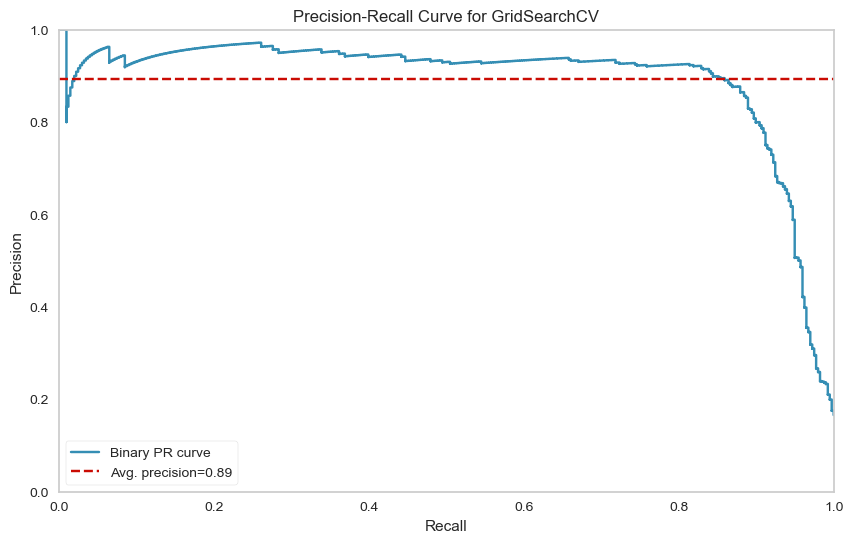

In [336]:
# precision recall curve for grid model
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    grid_svc_model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

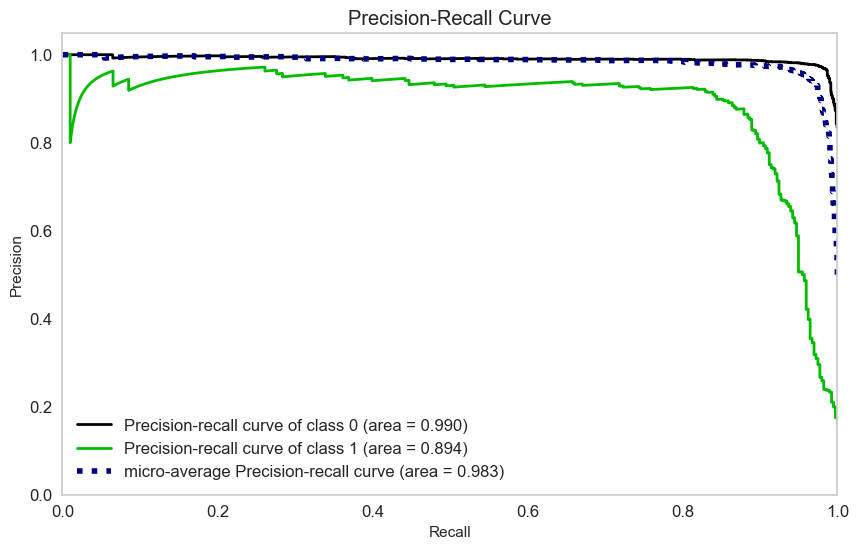

In [337]:
# precision recall curve for grid model using scikit-plot 

!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_svc_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.77      0.91      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.93      0.90      2399
weighted avg       0.95      0.94      0.94      2399


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      7999
           1       0.83      0.95      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.91      0.96      0.93      9592
weighted avg       0.96      0.96      0.96      9592



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
SVC           0.94     0.83         0.91            0.77            0.96   

     f1_train  recall_train  precision_train  
SVC      0.89          0.95             0.83

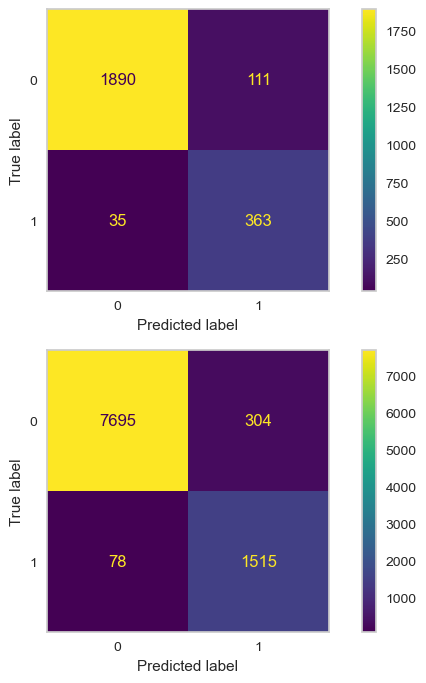

In [338]:
# prediction with grid SCV model for model comparison

out_score_svc = eval_metric_classification(
    grid_svc_model, X_train, y_train, X_test, y_test, 
    'SVC', average=None, labels=[1]
)
out_score_svc

### KNN

#### Vanilla KNN

In [339]:
from sklearn.neighbors import KNeighborsClassifier

operations_knn = [("column_trans", column_trans), ('scaler', scaler), ("knn", KNeighborsClassifier())]

# built a KNN pipe model with default hyperparameter
pipe_knn_model = Pipeline(steps=operations_knn)

In [340]:
# fit the KNN model on train data
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [341]:
# evaluation metrics for KNN model
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1916   85]
 [  43  355]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.81      0.89      0.85       398

    accuracy                           0.95      2399
   macro avg       0.89      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7810  189]
 [ 196 1397]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



#### KNN Model Cross Validation

In [342]:
model = Pipeline(steps=operations_knn)

# built cross validate object for KNN model
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.02        0.17           0.94            0.96     0.83      0.88   
1      0.02        0.15           0.95            0.96     0.86      0.87   
2      0.03        0.17           0.95            0.96     0.85      0.87   
3      0.01        0.13           0.95            0.96     0.85      0.87   
4      0.02        0.22           0.94            0.96     0.83      0.88   

   test_recall  train_recall  test_precision  train_precision  
0         0.83          0.88            0.84             0.87  
1         0.87          0.87            0.85             0.87  
2         0.87          0.87            0.83             0.87  
3         0.89          0.87            0.82             0.87  
4         0.84          0.88            0.83             0.88

test_accuracy     0.95
train_accuracy    0.96
test_f1           0.85
train_f1          0.87
test_recall       0.86
train_recall      0.87
test_precision    0.83
train_precision   0.87
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [343]:
# calculating test error rates for elbow method
test_error_rates = []

for k in range(1,30):
    operations_knn = [("column_trans", column_trans),
                      ('scaler', scaler),
                      ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=operations_knn) # {'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}
    pipe_knn_model.fit(X_train, y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

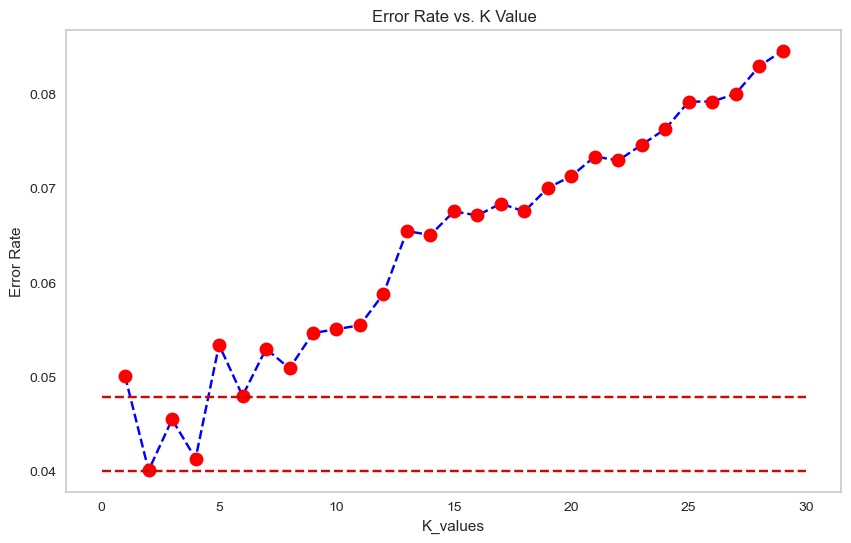

In [344]:
# variation of test error rates according to k values

plt.figure(figsize=(10,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.0478, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.040, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

In [345]:
# calculating test and train error rates for elbow method

test_error_rates = []
train_error_rates = []

for k in range(1,30):
    operations_knn = [("column_trans", column_trans),
                      ('scaler', scaler),
                      ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=operations_knn) 
    pipe_knn_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    y_pred_train = pipe_knn_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

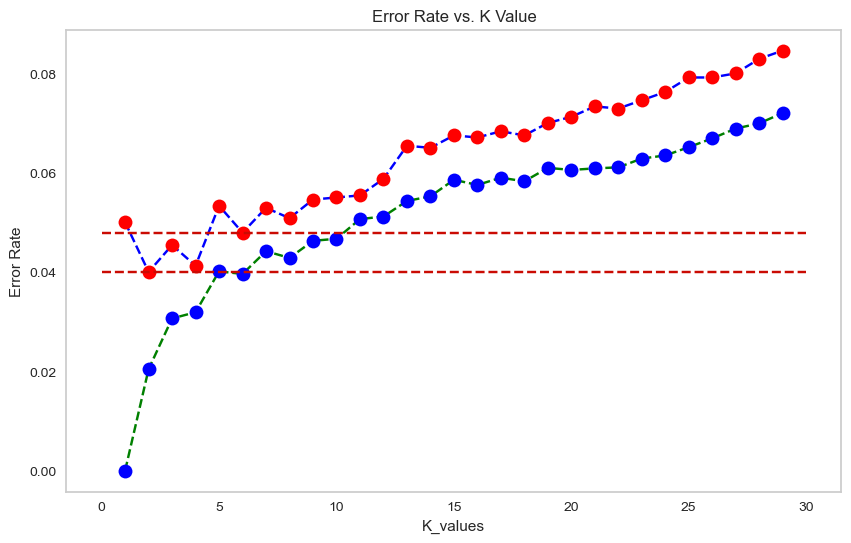

In [346]:
# variation of test and train error rates according to k values
plt.figure(figsize=(10,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.plot(range(1,30),
         train_error_rates,
         color='green',
         linestyle='--',
         marker='o',
         markerfacecolor='blue',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0478, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.040, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

#### KNN GridsearchCV

In [347]:
# reset the pipe model
operations_knn = [("column_trans", column_trans),
                  ('scaler', scaler),
                  ("KNN", KNeighborsClassifier())]
model = Pipeline(operations_knn)

k_values = range(4,20)

# defining the grid parameters
param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform'],
              'KNN__metric': ['minkowski']
               }

# built the KNN grid model object
grid_knn_model = GridSearchCV(model, param_grid = param_grid, scoring="f1", cv=5, n_jobs=-1)

In [348]:
# fit the grid KNN model on train data
grid_knn_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__metric': ['minkowski'],
                         'KNN__n_neighbors': range(4, 20), 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform']},
             scoring='f1')

In [349]:
# grid KNN model best parameters
grid_knn_model.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 4,
 'KNN__p': 1,
 'KNN__weights': 'uniform'}

In [350]:
# grid KNN model best score
grid_knn_model.best_score_

0.8650649649114897

#### Evaluating Model Performance

In [351]:
# evaluation metrics for grid KNN model
eval_metric(grid_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1954   47]
 [  45  353]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.88      0.89      0.88       398

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7902   97]
 [ 194 1399]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7999
           1       0.94      0.88      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.96      0.93      0.94      9592
weighted avg       0.97      0.97      0.97      9592



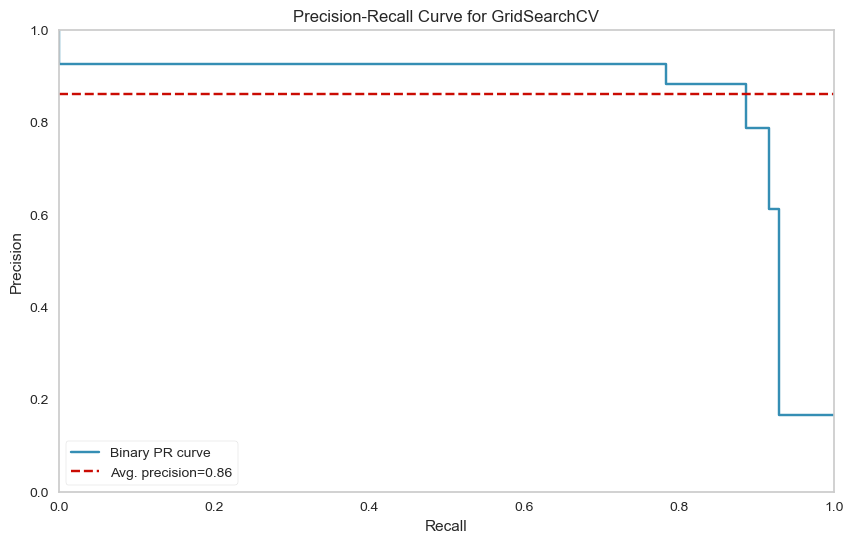

In [352]:
#precision recall curve for grid KNN model
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    grid_knn_model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

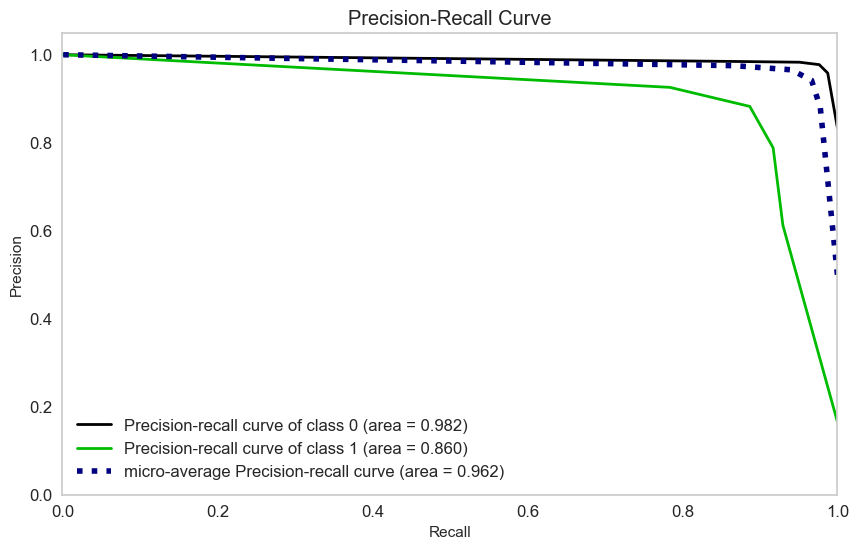

In [353]:
# precision recall curev for grid KNN model with scikit-plot
y_probas = grid_knn_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.88      0.89      0.88       398

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7999
           1       0.94      0.88      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.96      0.93      0.94      9592
weighted avg       0.97      0.97      0.97      9592



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
KNN           0.96     0.88         0.89            0.88            0.97   

     f1_train  recall_train  precision_train  
KNN      0.91          0.88             0.94

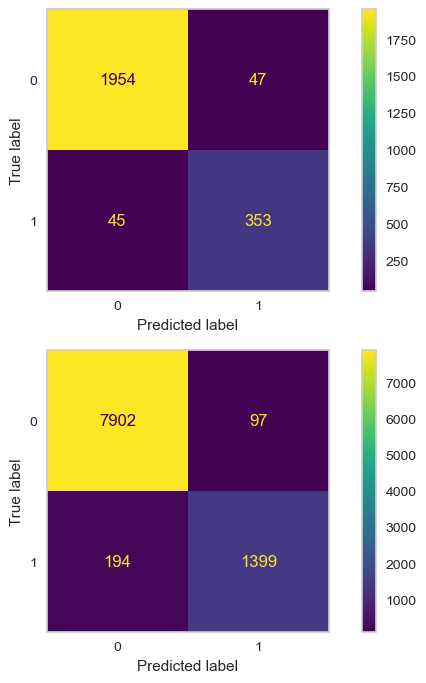

In [354]:
# prediction with grid KNN model
out_score_knn = eval_metric_classification(grid_knn_model,
                                           X_train,
                                           y_train,
                                           X_test,
                                           y_test,
                                           'KNN',
                                           average=None,
                                           labels=[1]
                                          )
out_score_knn

### Random Forest Classifier

In [355]:
# defining column transformer object for tree based models without scaling, because these models doesn't need scaling

cat = X_train.select_dtypes("object").columns
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1
                        ) 
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough'
                                      )

#### Model Building

In [356]:
# built a pipe model for Random Forest with default hyperparameter

operations_rf = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                  random_state=random_state))]
#built RF pipe model
pipe_rf_model = Pipeline(steps=operations_rf)

In [357]:
# fit the RF model on train data

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [358]:
# evaluation metrics of RF pipe model

eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1998    3]
 [  27  371]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   1 1592]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



#### Random Forest Model Cross Validation

In [359]:
# reset the model for cross validation
model = Pipeline(steps=operations_rf)

# built cross validate object for RF model
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True
                       )
df_scores =  pd.DataFrame.from_dict(scores,
                                    orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.81        0.06           0.98            1.00     0.94      1.00   
1      0.73        0.05           0.98            1.00     0.95      1.00   
2      0.80        0.06           0.98            1.00     0.95      1.00   
3      0.83        0.04           0.99            1.00     0.96      1.00   
4      0.66        0.04           0.98            1.00     0.92      1.00   

   test_recall  train_recall  test_precision  train_precision  
0         0.90          1.00            0.99             1.00  
1         0.92          1.00            0.98             1.00  
2         0.91          1.00            0.99             1.00  
3         0.92          1.00            1.00             1.00  
4         0.87          1.00            0.98             1.00

test_accuracy     0.98
train_accuracy    1.00
test_f1           0.94
train_f1          1.00
test_recall       0.90
train_recall      1.00
test_precision    0.99
train_precision   1.00
dtype: float64

####  GridSearchCV for Random Forest Model

In [360]:
# reset the model
operations_rf = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                  random_state=random_state))]

model = Pipeline(steps=operations_rf)

# define grid parameters
param_grid = {
            "RF_model__n_estimators":[5,10,20],  # np.arange(50,250,50)
            "RF_model__criterion":["entropy","gini"],
            "RF_model__max_features":['auto',"log2"],
            "RF_model__max_depth": [2,3,5,10],
            "RF_model__min_samples_split": [2, 5],
            "RF_model__min_samples_leaf" : [1, 5]}

# built RF grid model
grid_rf_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="f1",
                          cv=5,
                          n_jobs = -1)

In [361]:
# fit he RF grid model on train data

grid_rf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [2, 3, 5, 10],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [5, 10, 20]},
             scoring='f1')

In [362]:
# check the RF grid model best score
grid_rf_model.best_score_

0.946514965879485

In [363]:
# check the RF grid model best score
grid_rf_model.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 10,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 20}

In [364]:
# check the RF grid model best score
grid_rf_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='auto', n_estimators=20,
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

In [365]:
# evaluation metrics for RF grid model

eval_metric(grid_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1996    5]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7983   16]
 [  96 1497]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



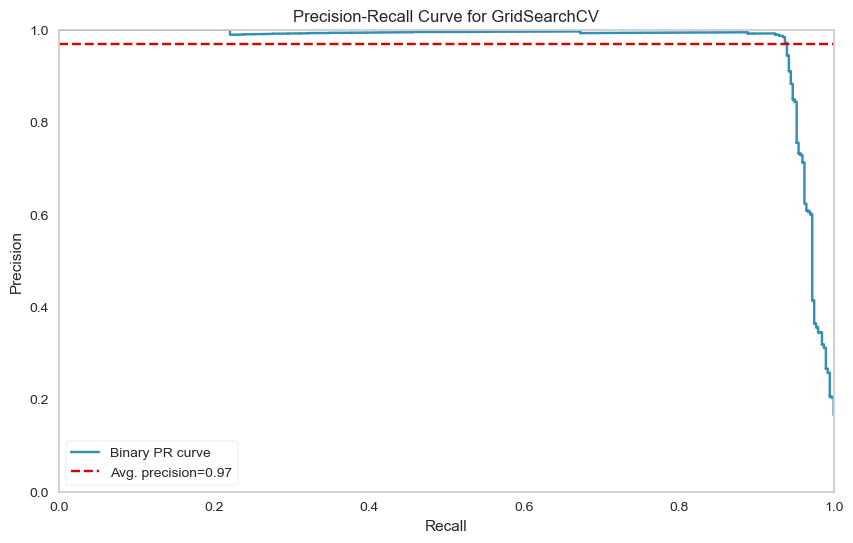

In [366]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(estimator=grid_rf_model,
                           classes=grid_rf_model.classes_,
                           per_class=True,cmap="Set1"
                          )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();
# for class 1

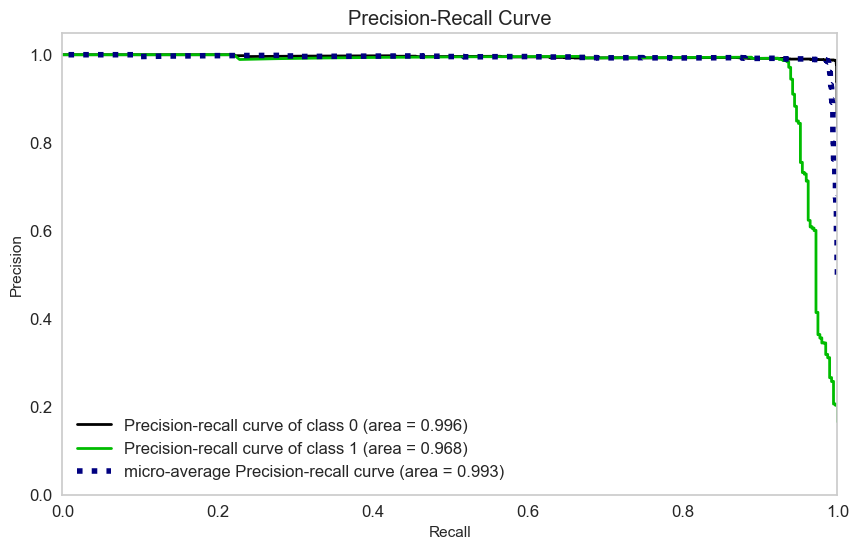

In [367]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_rf_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest           0.99     0.96         0.93            0.99   

               accuracy_train  f1_train  recall_train  precision_train  
Random Forest            0.99      0.96          0.94             0.99

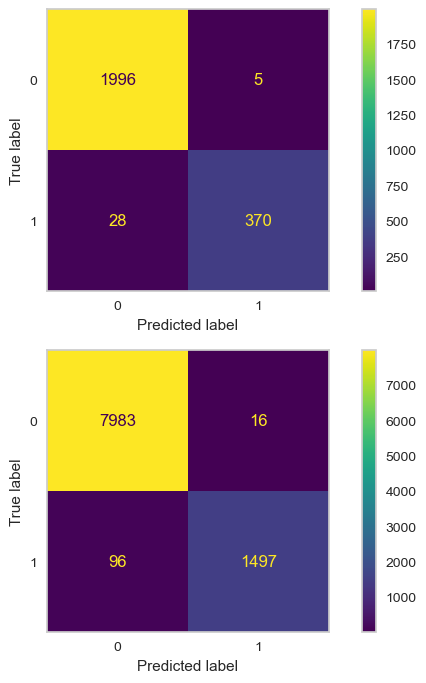

In [368]:
# prediction with RF grid model for model comparison
out_score_rf = eval_metric_classification(grid_rf_model,
                                          X_train,
                                          y_train,
                                          X_test,
                                          y_test,
                                          'Random Forest',
                                          average=None,
                                          labels=[1]
                                         )
out_score_rf

### XGBoost Classifier

In [369]:
# defining class weights parameter for XGBoost Classifier

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights  # to show all class weights
# pd.Series(classes_weights).unique() # to show unique class weights

array([0.59957495, 3.01067169, 0.59957495, ..., 0.59957495, 0.59957495,
       0.59957495])

#### Model Building

In [370]:
# # built XGB pipe model
operations_xgb = [("OrdinalEncoder", column_trans),
               ("XGB_model", XGBClassifier(random_state=random_state))]

pipe_xgb_model = Pipeline(steps=operations_xgb)

In [371]:
# fit the XGB pipe model on train data

pipe_xgb_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

In [372]:
# evaluation metrics of RF pipe model

eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[1939   62]
 [  18  380]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.86      0.95      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7843  156]
 [ 100 1493]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.91      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



#### Cross Validation for XGB Model

In [373]:
# reset the model for cross validation
model = Pipeline(steps=operations_xgb)

# built cross validate object for XGBoost model
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        cv=5,
                        return_train_score=True
                       )
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.47        0.02           0.97            0.97     0.90      0.92   
1      0.48        0.02           0.97            0.97     0.91      0.92   
2      0.43        0.02           0.97            0.97     0.92      0.92   
3      0.52        0.03           0.97            0.97     0.92      0.92   
4      0.44        0.01           0.96            0.97     0.89      0.92   

   test_recall  train_recall  test_precision  train_precision  
0         0.92          0.94            0.88             0.90  
1         0.94          0.93            0.89             0.90  
2         0.94          0.94            0.90             0.90  
3         0.92          0.94            0.92             0.90  
4         0.92          0.94            0.87             0.91

test_accuracy     0.97
train_accuracy    0.97
test_f1           0.91
train_f1          0.92
test_recall       0.93
train_recall      0.94
test_precision    0.89
train_precision   0.90
dtype: float64

####  GridSearchCV for XGBoost Model

In [374]:
# reset the model
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=random_state))]

model = Pipeline(steps=operations_xgb)

# define grid parameters
param_grid = {"XGB_model__n_estimators":np.linspace(20, 150, 5, dtype=int),
              'XGB_model__max_depth':np.arange(1,4,1),
              "XGB_model__learning_rate": np.linspace(0.01, 1, 4).round(3),
              "XGB_model__subsample":np.arange(0.8,1,2),
              "XGB_model__colsample_bytree":np.linspace(0.8,1,2) # Subsample ratio of columns when constructing each tree.
             }

# param_grid = {"XGB_model__n_estimators":[50, 100],
#               'XGB_model__max_depth':[1,2],
#               "XGB_model__learning_rate": [0.1, 0.3],
#               "XGB_model__subsample":[0.8, 1],
#               "XGB_model__colsample_bytree":[0.8, 1]}

# built RF grid model object
grid_xgb_model = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              scoring='f1',
                              n_jobs=-1,
                              cv=5,
                              verbose=2
                             )

In [375]:
# fit he RF grid model on train data

grid_xgb_model.fit(X_train,
                   y_train,
                   XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': array([0.8, 1. ]),
                         'XGB_model__learning_rate': array([0.01, 0.34, 0.67, 1.  ]),
                         'XGB_model__max_depth': array([1, 2, 3]),
                         'XGB_model__n_estimators': array([ 20,  52,  85, 117, 150]),
                         'XGB_model__subsample': array([0.8])},
             scoring='f1', verbose=2)

In [376]:
# check the RF grid model best estimator
grid_xgb_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=1.0, learning_rate=0.67,
                               n_estimators=150, random_state=101,
                               subsample=0.8))])

In [377]:
# check the RF grid model best parameters
grid_xgb_model.best_params_

{'XGB_model__colsample_bytree': 1.0,
 'XGB_model__learning_rate': 0.67,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 150,
 'XGB_model__subsample': 0.8}

In [378]:
# check the RF grid model best score
grid_xgb_model.best_score_

0.9169751313395288

#### Evaluating Model Performance and Tuning

In [379]:
# check the evaluation metrics of XGB grid model

eval_metric(grid_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[1957   44]
 [  20  378]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2001
           1       0.90      0.95      0.92       398

    accuracy                           0.97      2399
   macro avg       0.94      0.96      0.95      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7940   59]
 [   5 1588]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7999
           1       0.96      1.00      0.98      1593

    accuracy                           0.99      9592
   macro avg       0.98      0.99      0.99      9592
weighted avg       0.99      0.99      0.99      9592



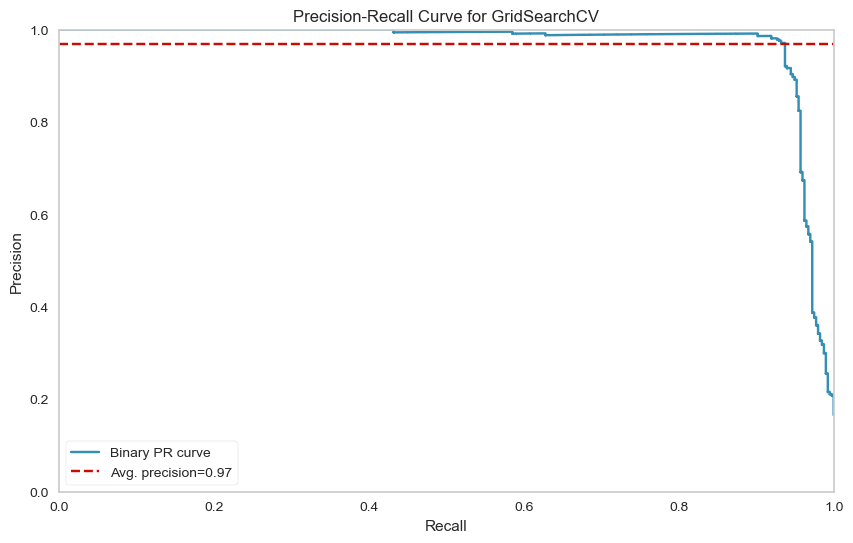

In [380]:
# precision-recall curve for RF grid model
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(estimator=grid_xgb_model,
                           classes=grid_xgb_model.classes_,
                           per_class=True,
                           cmap="Set1"
                          )
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();
# for class 1

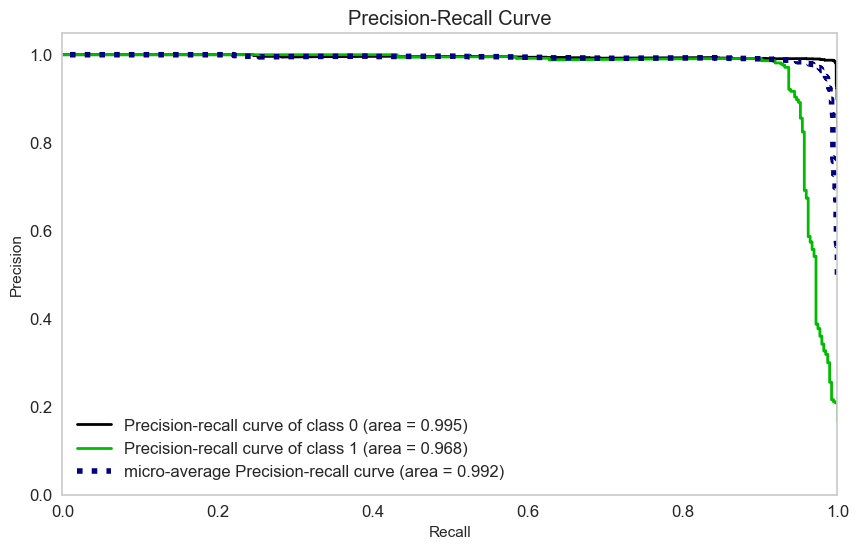

In [381]:
# precision-recall curve for RF grid model with scikit-plot
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_xgb_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2001
           1       0.90      0.95      0.92       398

    accuracy                           0.97      2399
   macro avg       0.94      0.96      0.95      2399
weighted avg       0.97      0.97      0.97      2399


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7999
           1       0.96      1.00      0.98      1593

    accuracy                           0.99      9592
   macro avg       0.98      0.99      0.99      9592
weighted avg       0.99      0.99      0.99      9592



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
XGBoost           0.97     0.92         0.95            0.90            0.99   

         f1_train  recall_train  precision_train  
XGBoost      0.98          1.00             0.96

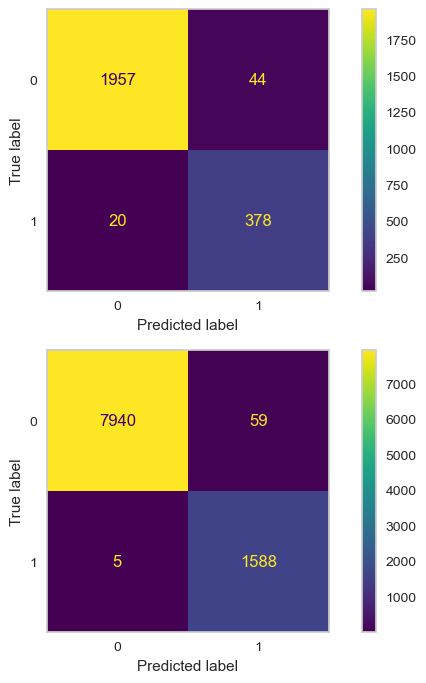

In [382]:
# prediction with RF grid model for model comparison
out_score_xgb = eval_metric_classification(grid_xgb_model,
                                           X_train,
                                           y_train,
                                           X_test,
                                           y_test,
                                           'XGBoost',
                                           average=None,
                                           labels=[1])
out_score_xgb

### ANN Classifier

### Import Libraries

In [383]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
# from keras.optimizers import Adam, Nadam, RMSprop, Nadam

# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # deprecated

from sklearn.metrics import  SCORERS, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [384]:
X = df.drop(columns="left")
y = df.left

In [385]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
X_train.shape, X_test.shape

((9592, 9), (2399, 9))

In [386]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9592, 9)
Train target shape   :  (9592,)
Test features shape  :  (2399, 9)
Test target shape    :  (2399,)


### Define Useful Function

In [387]:
# defining a function to save column_trans object, scaler object and ANN model
def save_pipeline_keras(pipe_model, folder_name='.'):
    os.makedirs(folder_name, exist_ok=True) 
    
    import pickle   
    pickle.dump(pipe_model['column_trans'], open(folder_name+'/column_trans.pkl','wb'))
    pickle.dump(pipe_model['scaler'], open(folder_name+'/scaler.pkl','wb'))
    pipe_model['ann'].save(folder_name+'/churn_pred.h5')

In [388]:
# defining a function to load column_trans object, scaler object and ANN model
def load_pipeline_keras(model, scaler=None, column_trans=None, folder_name='.'):
    from tensorflow.keras.models import load_model
    from sklearn.pipeline import Pipeline
    import pickle
    
    if scaler:
        scaler = pickle.load(open(folder_name+'/'+scaler, 'rb'))
    if column_trans:
        column_trans = pickle.load(open(folder_name+'/'+column_trans, 'rb'))   
        
    model = load_model('churn_pred.h5')
    
    return Pipeline(steps=[
        ("column_trans", column_trans), 
        ("scaler", scaler), 
        ("ann", model)])

#### Layer Architecture Building and Compiling

In [15]:
# def build_classifier(input_dim):
#     import tensorflow as tf
#     tf.keras.backend.clear_session()
#     tf.random.set_seed(101)
    
#     classifier = Sequential()
#     classifier.add(Dense(units = 36, activation = 'relu', input_dim = input_dim))
#     classifier.add(Dense(units = 18, activation = 'relu'))
#     classifier.add(Dense(units = 9, activation = 'relu'))
#     classifier.add(Dense(units = 1, activation = 'sigmoid'))
#     classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['Recall'])
#     return classifier

In [389]:
# defining a function to built ANN model
def build_classifier_model(
        optimizer: tf.keras.optimizers.Optimizer,
        learning_rate: float = 1e-3,
        input_dim: int = 18,
) -> tf.keras.models.Model:  # assign func. type
    
#     from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adadelta
#     from keras.optimizers import Adam, Nadam, RMSprop, Nadam
    import tensorflow as tf
    import numpy as np
    tf.keras.backend.clear_session()
    tf.random.set_seed(101)
    np.random.seed(101)
    
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units=16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units=8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer(learning_rate=learning_rate), 
                  loss='binary_crossentropy', 
                  metrics=['Recall'], 
                  weighted_metrics=['Recall'])
    return model

In [390]:
# select 'TPU' or 'GPU' etc.
if tf.config.list_physical_devices('GPU'):
    strategy = tf.distribute.MirroredStrategy()
else:  # Use the Default Strategy
    strategy = tf.distribute.get_strategy()

with strategy.scope():  
    from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
    from sklearn.compose import make_column_transformer, ColumnTransformer
    from sklearn.pipeline import Pipeline

    column_trans = make_column_transformer(
                (OneHotEncoder(handle_unknown="ignore", sparse=False), ["departments"]),
                (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["salary"]), 
                remainder='passthrough',
    )
    # pd.DataFrame(data=column_trans.fit_transform(X_train), columns=column_trans.get_feature_names_out())
    
    scaler = MinMaxScaler()

    model = build_classifier_model(Adam) # built the model with defined function above
    
    pipe_ann = Pipeline(steps=[("column_trans", column_trans),
                               ("scaler", scaler),
                               ("ann", model)])    
#     display(pipe_ann.get_params())

In [391]:
# pipe_ann['ann'].summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [392]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train),
                         class_weight.compute_class_weight(class_weight='balanced',
                                                           classes=np.unique(y_train),
                                                           y=y_train)
))
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

In [22]:
# from sklearn.utils import class_weight
# sample_weight = class_weight.compute_sample_weight(class_weight={0: 0.6, 1: 2.1}, y=y_train)
# sample_weight

In [393]:
# defining early stop object for ANN model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           mode="min",
                           verbose=1,
                           patience=5,
                           restore_best_weights=True)

In [394]:
%%time
# fit the ANN model on train data
pipe_ann.fit(X_train,
             y_train,
             ann__validation_split=0.1,
             ann__batch_size=32,
             ann__epochs=500,
             ann__verbose=1,
             ann__callbacks=[early_stop],
             ann__class_weight=class_weights)

Epoch 1/500
270/270 [==============================] - 3s 5ms/step - loss: 0.6432 - recall: 0.6541 - recall_1: 0.6541 - val_loss: 0.4961 - val_recall: 0.2970 - val_recall_1: 0.2970
Epoch 2/500
270/270 [==============================] - 1s 3ms/step - loss: 0.4966 - recall: 0.7941 - recall_1: 0.7941 - val_loss: 0.4206 - val_recall: 0.7515 - val_recall_1: 0.7515
Epoch 3/500
270/270 [==============================] - 1s 4ms/step - loss: 0.3944 - recall: 0.8466 - recall_1: 0.8466 - val_loss: 0.3733 - val_recall: 0.8485 - val_recall_1: 0.8485
Epoch 4/500
270/270 [==============================] - 1s 3ms/step - loss: 0.3266 - recall: 0.8768 - recall_1: 0.8768 - val_loss: 0.2935 - val_recall: 0.8909 - val_recall_1: 0.8909
Epoch 5/500
270/270 [==============================] - 1s 3ms/step - loss: 0.3073 - recall: 0.8761 - recall_1: 0.8761 - val_loss: 0.2792 - val_recall: 0.8909 - val_recall_1: 0.8909
Epoch 6/500
270/270 [==============================] - 1s 4ms/step - loss: 0.2816 - recall: 0.8

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x000002433F225CA0>)])

In [395]:
save_pipeline_keras(pipe_ann)

<IPython.core.display.Javascript object>

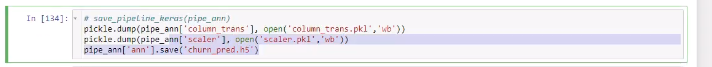

In [194]:
# import pickle
# pickle.dump(pipe_ann[:-1], open("encode_and_scale.pkl", 'wb'))
# model.save('churn_pred.h5')

In [396]:
# summary = pd.DataFrame(pipe_ann['ann'].history.history)
summary = pd.DataFrame(model.history.history)
summary

loss  recall  recall_1  val_loss  val_recall  val_recall_1
0   0.64    0.65      0.65      0.50        0.30          0.30
1   0.50    0.79      0.79      0.42        0.75          0.75
2   0.39    0.85      0.85      0.37        0.85          0.85
3   0.33    0.88      0.88      0.29        0.89          0.89
4   0.31    0.88      0.88      0.28        0.89          0.89
5   0.28    0.90      0.90      0.26        0.90          0.90
6   0.28    0.90      0.90      0.27        0.90          0.90
7   0.26    0.90      0.90      0.24        0.90          0.90
8   0.26    0.89      0.89      0.24        0.92          0.92
9   0.27    0.90      0.90      0.22        0.91          0.91
10  0.25    0.90      0.90      0.24        0.90          0.90
11  0.24    0.90      0.90      0.21        0.91          0.91
12  0.24    0.91      0.91      0.23        0.90          0.90
13  0.24    0.90      0.90      0.19        0.91          0.91
14  0.23    0.92      0.92      0.19        0.90          0.90
15  0.24    0.91      0.91      0.21        0.90          0.90
16  0.23    0.91      0.91      0.21        0.91          0.91
17  0.22    0.91      0.91      0.20        0.91          0.91
18  0.22    0.92      0.92      0.20        0.90          0.90
19  0.22    0.91      0.91      0.19        0.91          0.91

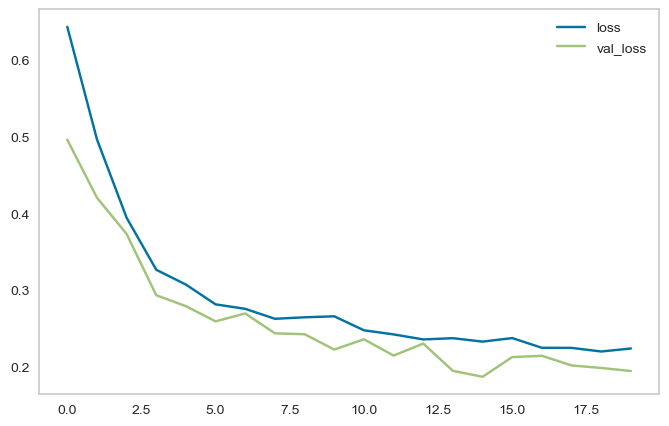

In [397]:
summary[["loss", "val_loss"]].plot(figsize=(8, 5));
plt.show()

In [398]:
model.metrics_names

['loss', 'recall', 'recall_1']

In [399]:
# metrics = ['loss', 'binary_accuracy', 'recall', 'precision', 'auc', 'precision_at_recall']
# colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

# defining a function to plot ANN model metrics
def plot_metrics(history, metrics_names):
    for n, metric in enumerate(metrics_names):
        name = str(metric).replace("_"," ").capitalize()
        plt.subplot(3, 2, n+1)
        plt.plot(history.epoch, history.history[metric], 
                 color='xkcd:dodger blue', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='salmon', ls="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name, fontsize=12)
        plt.legend()
        plt.tight_layout(pad=0.3)
        if metric == 'loss':
            plt.ylim(top=plt.ylim()[1])
        else: # plt.ylim(plt.gca().get_ylim())
            plt.ylim(bottom=plt.ylim()[0])

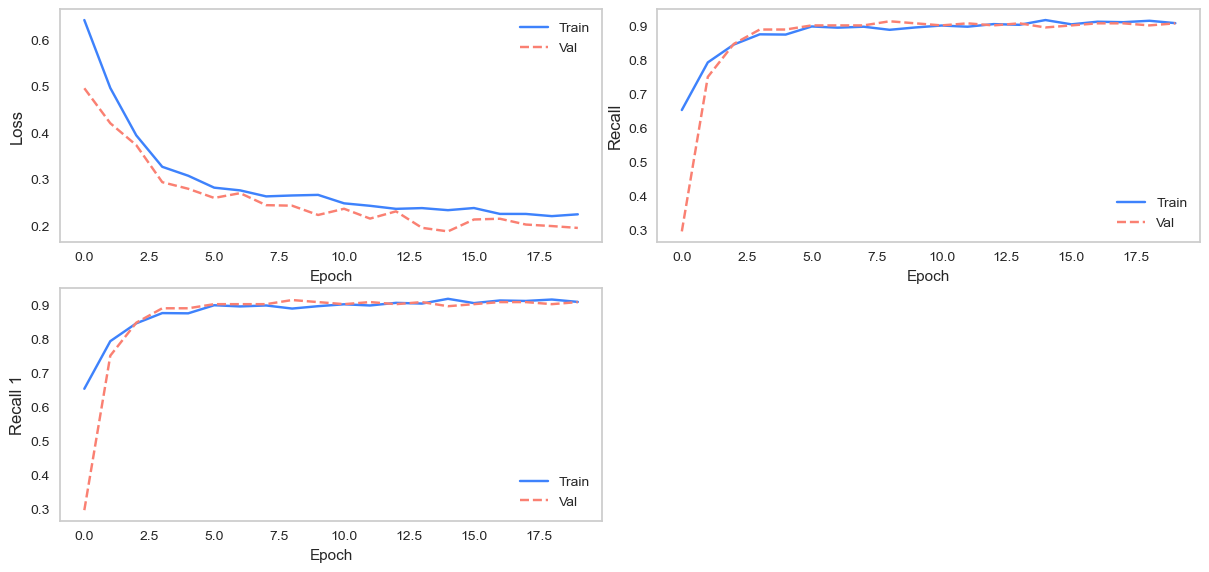

In [400]:
metrics = summary.columns[:6]
plt.figure(figsize=(12, 8))
plot_metrics(history=model.history, metrics_names=model.metrics_names)

In [401]:
# check the ANN model metrics
print(pipe_ann[-1].evaluate((pipe_ann[:-1].transform(X_test)), y_test, verbose=0, return_dict=1),
      pipe_ann[-1].evaluate((pipe_ann[:-1].transform(X_train)), y_train, verbose=0, return_dict=1), sep='\n')

{'loss': 0.1929650455713272, 'recall': 0.9195979833602905, 'recall_1': 0.9195979833602905}
{'loss': 0.16499581933021545, 'recall': 0.9183929562568665, 'recall_1': 0.9183929562568665}


In [402]:
# evaluation metrics for ANN model
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred = pipe_ann.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = pipe_ann.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
75/75 [==============================] - 0s 1ms/step
[[1902   99]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2001
           1       0.79      0.92      0.85       398

    accuracy                           0.95      2399
   macro avg       0.89      0.94      0.91      2399
weighted avg       0.95      0.95      0.95      2399

-------------------------------------------------------
TRAIN
300/300 [==============================] - 0s 1ms/step
[[7655  344]
 [ 130 1463]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7999
           1       0.81      0.92      0.86      1593

    accuracy                           0.95      9592
   macro avg       0.90      0.94      0.92      9592
weighted avg       0.95      0.95      0.95      9592



75/75 [==============================] - 0s 2ms/step


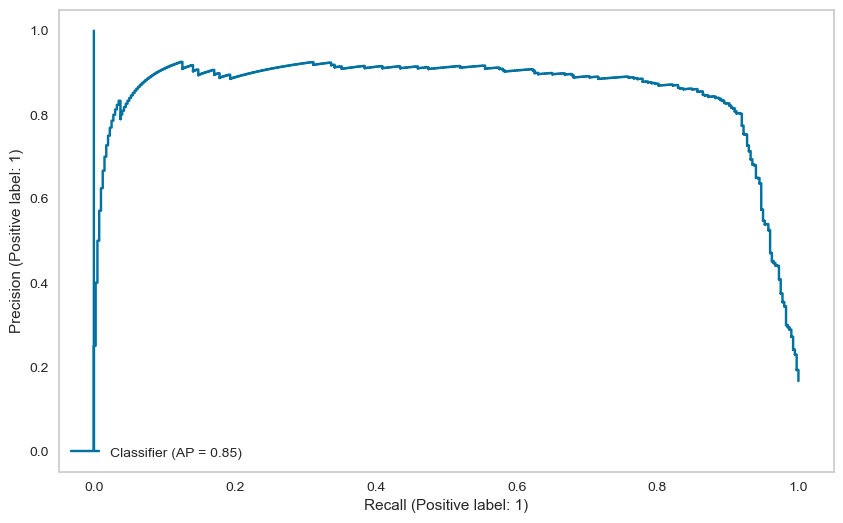

In [403]:
# precision recall curve for ANN model
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = pipe_ann.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

75/75 [==============================] - 0s 1ms/step


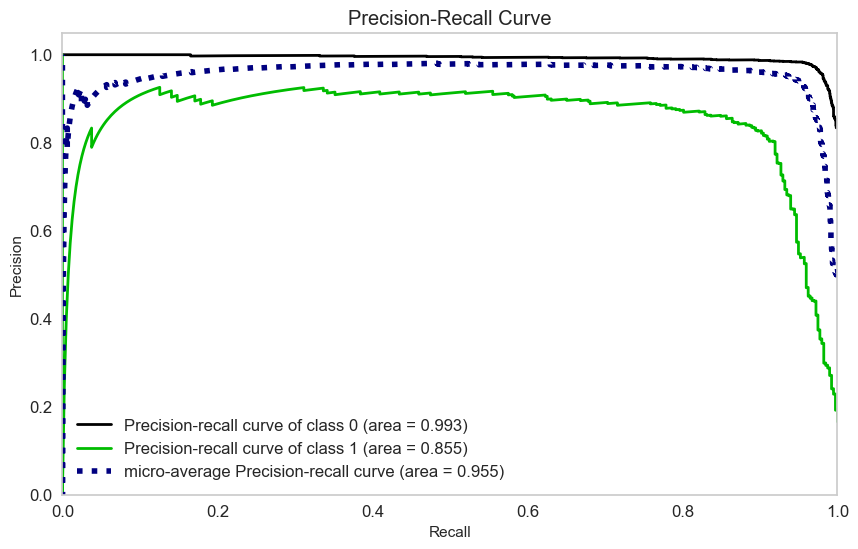

In [404]:
# precision recall curve for ANN model with scikit-plot

y_pred_proba = pipe_ann.predict(X_test)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
plt.show()

#### Cross Validation for ANN

In [405]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
# from keras.optimizers import Adam, Nadam, RMSprop, Nadam

# classifier = KerasClassifier(
#     build_fn = build_classifier, input_dim=18, validation_split = .1, batch_size = 32, epochs = 2000, verbose=1, 
#     callbacks = [early_stop], class_weight = class_weights,
# )
classifier = KerasClassifier(model=lambda: build_classifier_model(Adam),
                             validation_split=.1,
                             batch_size=32,
                             epochs=2000,
                             verbose=1,
                             callbacks=[early_stop],
                             class_weight=class_weights)

model = Pipeline(steps=[("column_trans", column_trans),
                 ("scaler", scaler),
                 ("ann", classifier)]) 

scoring = {'precision_1': make_scorer(precision_score, average=None, labels=[1]),
           'recall_1': make_scorer(recall_score, average=None, labels=[1]),
           'f1_1': make_scorer(f1_score, average=None, labels=[1]),
           'accuracy': make_scorer(accuracy_score)
#     ,'neg_log_loss': 'neg_log_loss'
        } # or make_scorer(log_loss, greater_is_better=False, needs_proba=True)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
                        return_train_score=True,
                        error_score="raise",
                        n_jobs=-1,
                        cv=5,
#     fit_params={"ann__sample_weight":sample_weight}
)

df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmppiq36l26\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp6rk82s2w\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpji2isu8v\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpr43enqp5\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqgcwycdh\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp8la7j5vg\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpytq465_g\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp3f1mb2j0\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpnpsominu\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpvhb41sm6\assets


test_precision_1    0.76
train_precision_1   0.78
test_recall_1       0.92
train_recall_1      0.93
test_f1_1           0.83
train_f1_1          0.85
test_accuracy       0.94
train_accuracy      0.95
dtype: float64

#### With Best Parameters (GridsearchCV)

why fit sample_weight:
- https://www.adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html

why compile weighted_metrics:
- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [406]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# reset the model
classifier = KerasClassifier(model=build_classifier_model,
                             validation_split=.1,
                             epochs=50,
                             verbose=1,
                             callbacks=[early_stop],
                             class_weight=class_weights
                            )

# reset the pipe ANN model
model = Pipeline(steps=[("column_trans", column_trans),
                        ("scaler", scaler),
                        ("ann", classifier)
                       ]) 

# defining grid parameters
param_grid = {'ann__batch_size': [32],
              'ann__model__optimizer': [Nadam],
              'ann__model__learning_rate': [0.001, 0.002]
             }

# built grid ANN model
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1', # 'neg_log_loss'
#     error_score="raise",
                          verbose=1,
                          n_jobs=-1,
                          cv=5
                         )
# grid_model.estimator.get_params().keys()

In [407]:
%%time
# fit grid ANN model on train data
grid_model.fit(X_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp9ev639zt\assets
Fitting 5 folds for each of 2 candidates, totalling 10 fits
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpf9_lko3t\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmphgf4hd32\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmplbvmxwq7\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp9r62y8u5\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpn5vu549c\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp1o4kdg2r\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpk3u27wj4\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpyz39r26z\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp9vspeic2\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tm

CPU times: total: 50.5 s
Wall time: 2min 31s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ann',
                                        KerasClassifie...433393CC40>], class_weight={0: 0.5995749468683585, 1: 3.01067168863779}, epochs=50, model=<function build_classifier_model at 0x000002433BACDEE0>, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ann__batch_size': [32],
                         'ann__model__learning_rate': [0.001, 0.002],
                         'ann__model__optimizer': [<class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='f1', verbose=1)

In [408]:
# checking the grid ANN model estimator
grid_model.estimator['ann'].model

<function __main__.build_classifier_model(optimizer: keras.optimizers.optimizer_v2.optimizer_v2.OptimizerV2, learning_rate: float = 0.001, input_dim: int = 18) -> keras.engine.training.Model>

In [409]:
# checking the parameters' keys of grid ANN model estimator
grid_model.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'column_trans', 'scaler', 'ann', 'column_trans__n_jobs', 'column_trans__remainder', 'column_trans__sparse_threshold', 'column_trans__transformer_weights', 'column_trans__transformers', 'column_trans__verbose', 'column_trans__verbose_feature_names_out', 'column_trans__onehotencoder', 'column_trans__ordinalencoder', 'column_trans__onehotencoder__categories', 'column_trans__onehotencoder__drop', 'column_trans__onehotencoder__dtype', 'column_trans__onehotencoder__handle_unknown', 'column_trans__onehotencoder__max_categories', 'column_trans__onehotencoder__min_frequency', 'column_trans__onehotencoder__sparse', 'column_trans__ordinalencoder__categories', 'column_trans__ordinalencoder__dtype', 'column_trans__ordinalencoder__encoded_missing_value', 'column_trans__ordinalencoder__handle_unknown', 'column_trans__ordinalencoder__unknown_value', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'ann__model', 'ann__build_fn', 'ann__warm_start', 'ann__

In [410]:
# checking the grid ANN model estimator
grid_model.estimator['ann']

KerasClassifier(
	model=<function build_classifier_model at 0x000002433BACDEE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000002433393CC40>]
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight={0: 0.5995749468683585, 1: 3.01067168863779}
)

In [411]:
# checking the grid ANN model best score
grid_model.best_score_

0.8363785919317916

In [412]:
# checking the grid ANN model best parameters
grid_model.best_params_

{'ann__batch_size': 32,
 'ann__model__learning_rate': 0.002,
 'ann__model__optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [413]:
# checking the grid ANN model results
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
1             0.84            0.02                1   
0             0.83            0.02                2   

                                              params  
1  {'ann__batch_size': 32, 'ann__model__learning_...  
0  {'ann__batch_size': 32, 'ann__model__learning_...

#### Evaluating Model Performance and Tunning

In [414]:
# evaluation metrics for grid ANN model
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred = grid_model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = grid_model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
75/75 [==============================] - 0s 1ms/step
[[1894  107]
 [  22  376]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2001
           1       0.78      0.94      0.85       398

    accuracy                           0.95      2399
   macro avg       0.88      0.95      0.91      2399
weighted avg       0.95      0.95      0.95      2399

-------------------------------------------------------
TRAIN
300/300 [==============================] - 0s 1ms/step
[[7640  359]
 [ 103 1490]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7999
           1       0.81      0.94      0.87      1593

    accuracy                           0.95      9592
   macro avg       0.90      0.95      0.92      9592
weighted avg       0.96      0.95      0.95      9592



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve) 

75/75 [==============================] - 0s 1ms/step


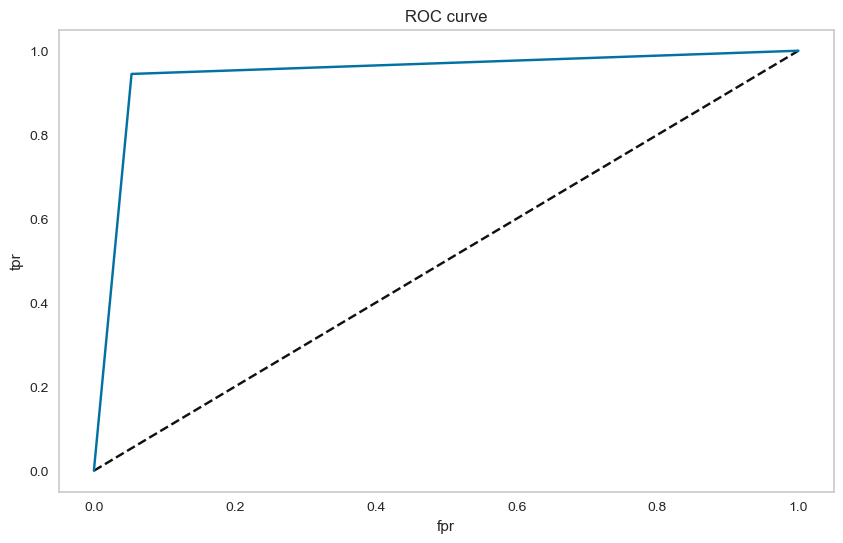

In [415]:
# ROC_AUC curve for grid ANN model
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [416]:
# grid ANN model roc_auc score
roc_auc_score(y_test, y_pred_proba)

0.9456251773610683

In [417]:
# grid ANN model average precision score
average_precision_score(y_test, y_pred_proba)

0.744607507169069

#### Prediction

300/300 [==============================] - 1s 2ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2001
           1       0.78      0.94      0.85       398

    accuracy                           0.95      2399
   macro avg       0.88      0.95      0.91      2399
weighted avg       0.95      0.95      0.95      2399


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7999
           1       0.81      0.94      0.87      1593

    accuracy                           0.95      9592
   macro avg       0.90      0.95      0.92      9592
weighted avg       0.96      0.95      0.95      9592



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
ANN           0.95     0.85         0.94            0.78            0.95   

     f1_train  recall_train  precision_train  
ANN      0.87          0.94             0.81

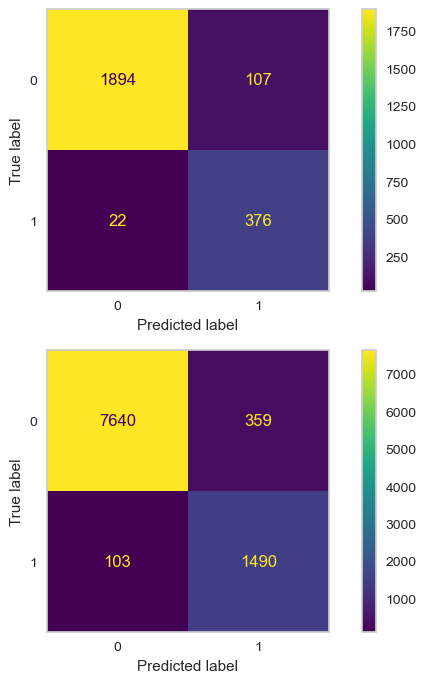

In [418]:
# model = load_pipeline_keras('./churn_pred.h5', './scaler.pkl', './column_trans.pkl')

# prediction with grid ANN model for model comparison
model = grid_model

out_score_ann = eval_metric_classification(model,
                                           X_train,
                                           y_train,
                                           X_test,
                                           y_test,
                                           'ANN',
                                           ml_model=False,
                                           average=None,
                                           labels=[1]
                                          )
out_score_ann

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [420]:
# Comparison of model metrics
compare = pd.concat([out_score_svc,
                     out_score_knn,out_score_rf,
                     out_score_xgb,
                     out_score_ann
                    ])
compare

accuracy_test  f1_test  recall_test  precision_test  \
SVC                     0.94     0.83         0.91            0.77   
KNN                     0.96     0.88         0.89            0.88   
Random Forest           0.99     0.96         0.93            0.99   
XGBoost                 0.97     0.92         0.95            0.90   
ANN                     0.95     0.85         0.94            0.78   

               accuracy_train  f1_train  recall_train  precision_train  
SVC                      0.96      0.89          0.95             0.83  
KNN                      0.97      0.91          0.88             0.94  
Random Forest            0.99      0.96          0.94             0.99  
XGBoost                  0.99      0.98          1.00             0.96  
ANN                      0.95      0.87          0.94             0.81

In [421]:
# saving model comparison metrics dataframe as csv file
compare.to_csv('models_compare.csv')

#### Accuracy Comparison

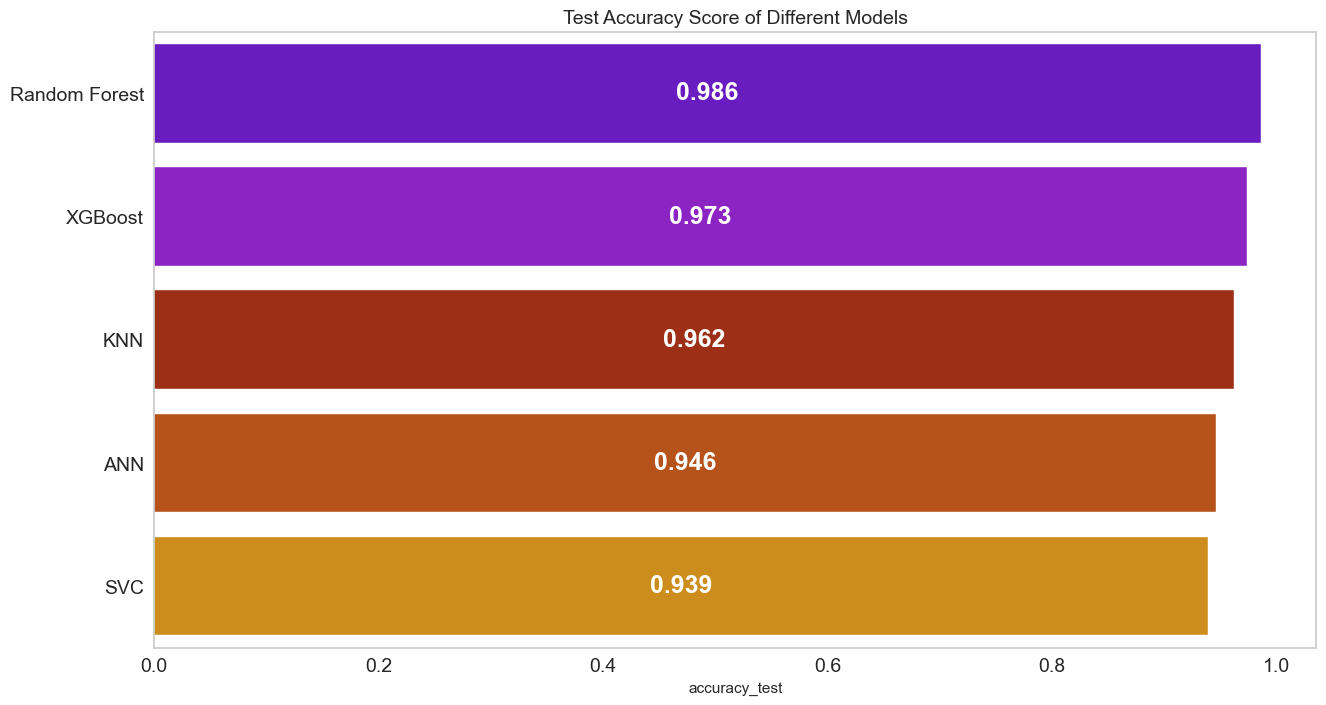

In [422]:
# comparison of accuracy scores of models
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### Recall Score Comparison

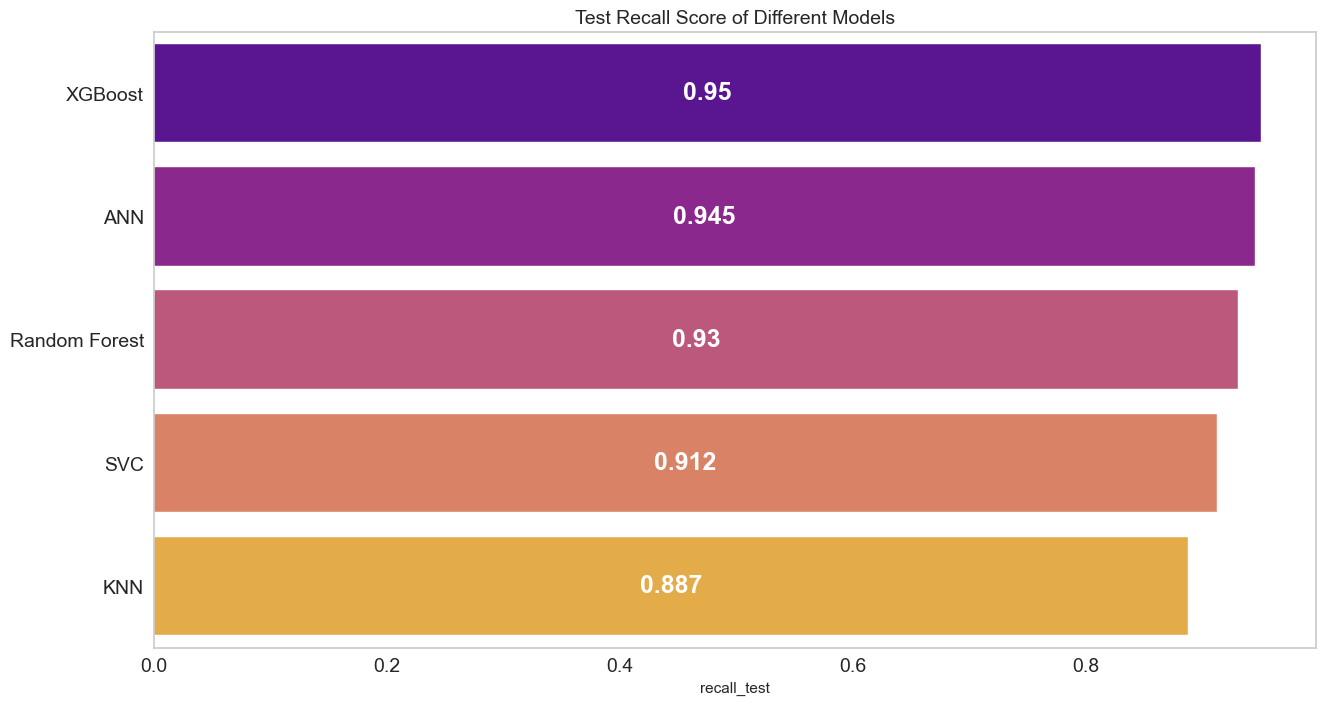

In [423]:
# comparison of recall scores of models
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### F1 Score Comparison

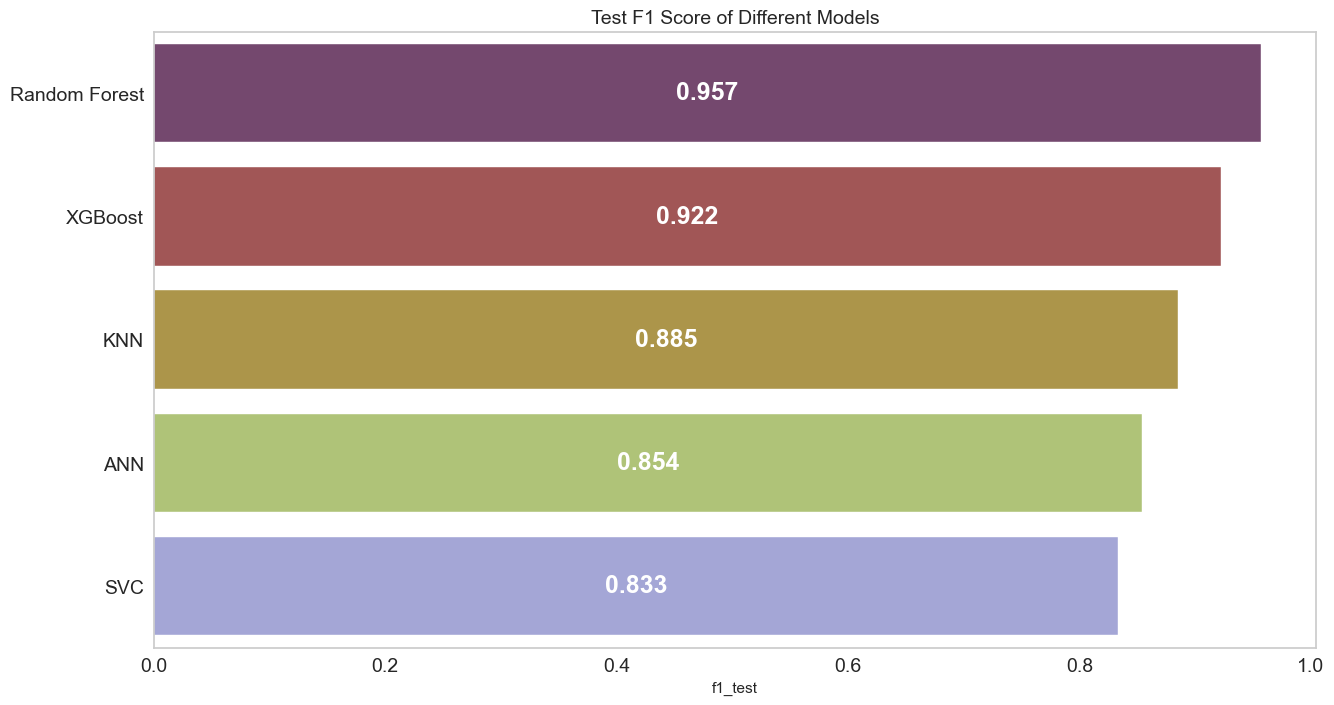

In [424]:
# comparison of f1_scores scores of models
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### Precision Score Comparison

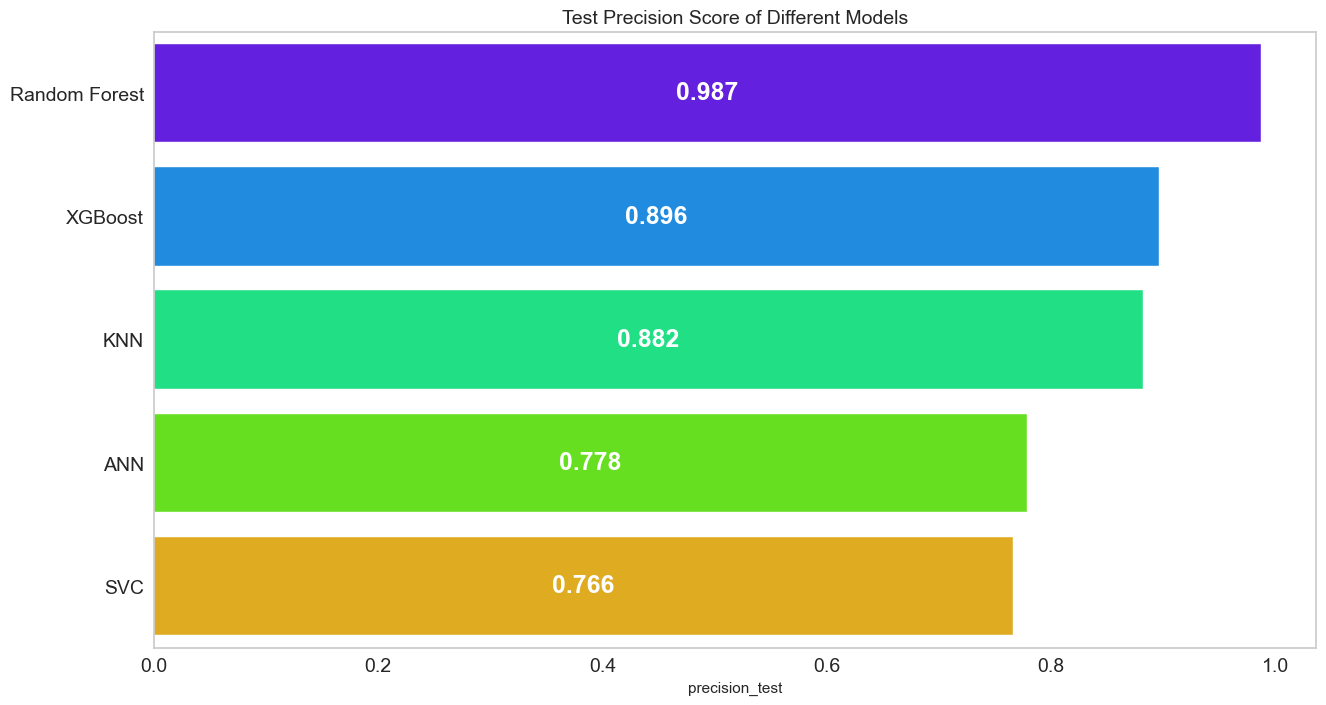

In [425]:
# comparison of precision scores of models
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

### Conclusion

**Accuracy :** The models with the highest three accuracy score is KNN, ANN and Random Forest models,respectively. We know that accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions.<br>
**Recall :** XGboost, Random Forest and ANN models have the highest recall score, respectively. Remember that model recall score represents the model’s ability to correctly predict the positives out of actual positives.<br>
**F1-Score :** When we examine the F1 score values, KNN, ANN and Random Forest models have the highest three scores, respectively.<br>
**Precision :** The model with the highest three Precision score is KNN, ANN and Random Forest models respectively. Note that the precision score can be used in the scenario where the machine learning model is required to identify all positive examples without any false positives.

> **Since Random Forest is the best model in terms of accuracy, f1 score and precision score, we will build our final model on Random Forest for this problem.**

### Final Model

In [280]:
# defining dependent and independent variables
X = df.drop(columns="left")
y = df.left
X.shape, y.shape

((11991, 9), (11991,))

In [426]:
# list of categorical columns' names
cat = X.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [434]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1
                        ) 

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough'
                                      )

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=10,  # Random Forest model with best hyperparameters
                                                  n_estimators=20,
                                                  criterion="entropy",
                                                  max_features="auto",
                                                  class_weight="balanced",
                                                  random_state=101))]

# built pipe RF final model
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='auto', n_estimators=20,
                                        random_state=101))])

In [428]:
X.describe()

satisfaction_level  last_evaluation  number_project  \
count            11991.00         11991.00        11991.00   
mean                 0.63             0.72            3.80   
std                  0.24             0.17            1.16   
min                  0.09             0.36            2.00   
25%                  0.48             0.57            3.00   
50%                  0.66             0.72            4.00   
75%                  0.82             0.86            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              11991.00            11991.00       11991.00   
mean                 200.47                3.36           0.15   
std                   48.73                1.33           0.36   
min                   96.00                2.00           0.00   
25%                  157.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  243.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years  
count               11991.00  
mean                    0.02  
std                     0.13  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

In [429]:
X.describe(include="O")

departments salary
count        11991  11991
unique          10      3
top          sales    low
freq          3239   5740

In [430]:
# create an observation in order to use it on prediction with final model

my_dict = {
    "satisfaction_level": 0.63,
    "last_evaluation": 0.4,
    "number_project": 4,
    "average_montly_hours": 200,
    "time_spend_company": 3,
    "work_accident": 1,
    "promotion_last_5years": 0,
    "departments": "sales",
    "salary": "medium"
    
}

new_obs = pd.DataFrame([my_dict])
new_obs

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.63             0.40               4                   200   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              1                      0       sales   

   salary  
0  medium

In [435]:
# final model predict on new observation
final_model.predict(new_obs)

array([0], dtype=int64)

#### Feature Importance of Final Model

In [440]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns)
features

['departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years']

In [437]:
# 2nd way to get feature names
# features = final_model["OrdinalEncoder"].get_feature_names_out()
# features

array(['ordinalencoder__departments', 'ordinalencoder__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [438]:
# get feature importance values
final_model["RF_model"].feature_importances_

# 2nd way:
# final_model[-1].feature_importances_

array([0.01070612, 0.0072174 , 0.28073282, 0.13121404, 0.16060882,
       0.13033237, 0.27071341, 0.00796229, 0.00051274])

In [442]:
rf_feature_imp = pd.DataFrame(data = final_model[-1].feature_importances_, index=features,
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
satisfaction_level                   0.28
time_spend_company                   0.27
number_project                       0.16
last_evaluation                      0.13
average_montly_hours                 0.13
departments                          0.01
work_accident                        0.01
salary                               0.01
promotion_last_5years                0.00

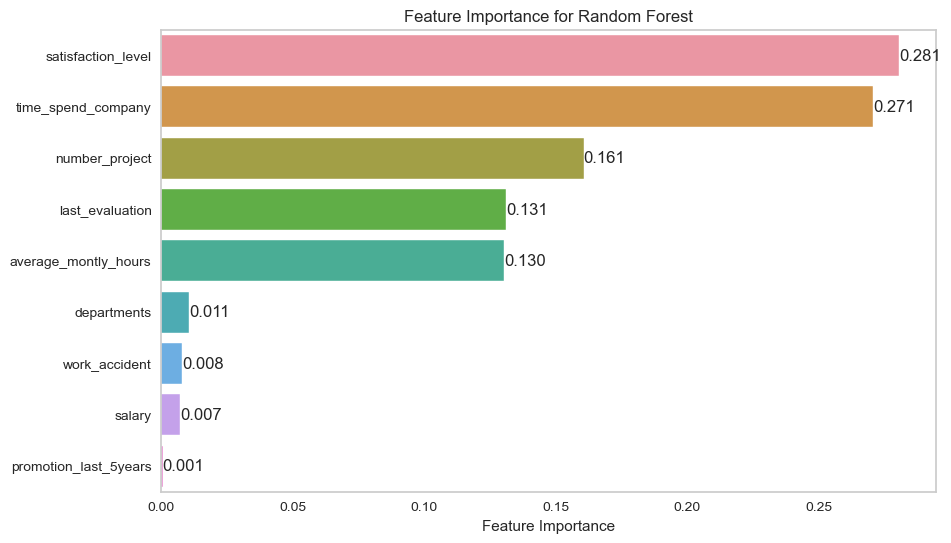

In [443]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

### Rebuilding Final Model with Most Important Features

In [450]:
# get the features having higher importance values
rf_feature_imp[rf_feature_imp.values > 0.1].index

Index(['satisfaction_level', 'time_spend_company', 'number_project',
       'last_evaluation', 'average_montly_hours'],
      dtype='object')

In [452]:
# get the data only containing features having higher importance
X = X[rf_feature_imp[rf_feature_imp.values > 0.1].index]
X.head()

satisfaction_level  time_spend_company  number_project  last_evaluation  \
0                0.38                   3               2             0.53   
1                0.80                   6               5             0.86   
2                0.11                   4               7             0.88   
3                0.72                   5               5             0.87   
4                0.37                   3               2             0.52   

   average_montly_hours  
0                   157  
1                   262  
2                   272  
3                   223  
4                   159

**As we don't have any categorical feature in final data(X) given above, we don't need ordinal encoding and column_trans steps.**

In [453]:
# built final model and fit the model on the data containing only 5 features
final_model_imp = RandomForestClassifier(max_depth=10,  # Random Forest model with best hyperparameters
                                         n_estimators=20,
                                         criterion="entropy",
                                         max_features="auto",
                                         class_weight="balanced",
                                         random_state=101)

final_model_imp.fit(X,y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='auto', n_estimators=20,
                       random_state=101)

In [454]:
# cross validation for the final model using last data
model = RandomForestClassifier(max_depth=10,  # Random Forest model with best hyperparameters
                               n_estimators=20,
                               criterion="entropy",
                               max_features="auto",
                               class_weight="balanced",
                               random_state=101)

scoring= ["accuracy", "f1", "recall", "precision"]

scores = cross_validate(model, X, y, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.18        0.02           0.99            0.99     0.96      0.97   
1      0.20        0.00           0.98            0.99     0.94      0.97   
2      0.19        0.02           0.98            0.99     0.95      0.96   
3      0.19        0.01           0.98            0.99     0.95      0.97   
4      0.17        0.02           0.98            0.99     0.94      0.97   

   test_recall  train_recall  test_precision  train_precision  
0         0.92          0.95            0.99             0.99  
1         0.90          0.95            0.99             0.99  
2         0.93          0.94            0.97             0.99  
3         0.91          0.94            0.99             0.99  
4         0.92          0.95            0.97             0.99

test_accuracy     0.98
train_accuracy    0.99
test_f1           0.95
train_f1          0.97
test_recall       0.92
train_recall      0.95
test_precision    0.98
train_precision   0.99
dtype: float64

> We built the Random Forest model using 5 features instead of 9 and we got the same scores. That's why we got our results by building on the 5 features that have the greatest impact on our final model, taking into account the calculation cost.

## 6. Model Deployment

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

In [455]:
import pickle
pickle.dump(final_model_imp, open("final_model_employee_churn", 'wb'))

In [456]:
loaded_final_model = pickle.load(open("final_model_employee_churn", "rb"))
loaded_final_model

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='auto', n_estimators=20,
                       random_state=101)

#### Prediction

In [457]:
X.sample(10)

satisfaction_level  time_spend_company  number_project  \
7093                 0.66                   5               4   
7198                 0.50                   3               3   
11018                0.57                   2               4   
10773                0.75                   4               5   
3068                 0.81                   2               3   
9540                 0.39                   2               2   
7504                 0.51                   4               5   
10547                0.90                   4               4   
847                  0.10                   4               6   
7265                 0.83                   3               4   

       last_evaluation  average_montly_hours  
7093              0.49                   194  
7198              0.81                   183  
11018             0.72                   214  
10773             0.77                   199  
3068              0.66                   181  
9540              0.39                   131  
7504              0.51                   222  
10547             0.76                   252  
847               0.81                   301  
7265              0.91                   266

In [458]:
X.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level   11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
time_spend_company   11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00
number_project       11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
last_evaluation      11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
average_montly_hours 11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00

In [459]:
new_obs = {"satisfaction_level": [0.63, 0.87],
           "last_evaluation": [0.45, 0.75],
           "number_project" : [4,6],
           "average_montly_hours" : [120,175],
           "time_spend_company": [3,5]
           }

In [460]:
samples = pd.DataFrame(new_obs)
samples

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.63             0.45               4                   120   
1                0.87             0.75               6                   175   

   time_spend_company  
0                   3  
1                   5

In [461]:
predictions = loaded_final_model.predict(samples)

In [462]:
samples["pred_pipe"] = predictions

In [463]:
samples

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.63             0.45               4                   120   
1                0.87             0.75               6                   175   

   time_spend_company  pred_pipe  
0                   3          0  
1                   5          0

In [464]:
predictions_proba = loaded_final_model.predict_proba(samples.iloc[:,:-1])
predictions_proba

array([[0.94088456, 0.05911544],
       [0.93524726, 0.06475274]])

### Streamlit Link

https://oznurkg-employee-churn-project-stream-employee-churn-app-y097cx.streamlit.app/

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___